<a href="https://colab.research.google.com/github/mihhwiNick/DA_project/blob/hoang/da06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1.3. Bài tập thực hành 1

Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

## 2.1.3.1. Tải các thư viện cần thiết

In [ ]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
import graphviz #to visualize decision trees
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

## 2.1.3.2. Tải và tiền xử lý dữ liệu (train.csv)

In [ ]:
# Tải dữ liệu
df = pd.read_csv('train.csv')

# --- 2.1. Xử lý giá trị thiếu (NaN) ---

# Điền giá trị thiếu cho 'Age' (Tuổi) bằng giá trị trung vị (median)
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

# Điền giá trị thiếu cho 'Embarked' (Cảng lên tàu) bằng giá trị xuất hiện nhiều nhất (mode)
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

# Cột 'Cabin' có quá nhiều giá trị thiếu, chúng ta sẽ bỏ qua nó

# --- 2.2. Chuyển đổi dữ liệu (Categorical -> Numerical) ---

# Chuyển 'Sex' (Giới tính) sang dạng số: female=1, male=0
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Chuyển 'Embarked' sang dạng số bằng One-Hot Encoding
# drop_first=True để tránh bẫy biến giả (dummy variable trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("Dữ liệu sau khi đã tiền xử lý (5 dòng đầu):")
print(df.head())

Dữ liệu sau khi đã tiền xử lý (5 dòng đầu):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3       

## 2.1.3.3. Lựa chọn đặc trưng (Features) và biến mục tiêu (Target)

In [ ]:
# Cột mục tiêu
target = 'Survived'

# Danh sách các đặc trưng (features) chúng ta sẽ dùng
# Loại bỏ các cột không liên quan như Name, Ticket, PassengerId, Cabin
features_list = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

# Kiểm tra xem tất cả các cột đã chọn có trong DataFrame không
for col in features_list:
    if col not in df.columns:
        print(f"Cảnh báo: Cột {col} không tồn tại!")

print(f"Các đặc trưng sẽ sử dụng: {features_list}")

Các đặc trưng sẽ sử dụng: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


## 2.1.3.4. Chia dữ liệu (Train/Test Split)

Tách dữ liệu thành 2 tập: huấn luyện (80%) và kiểm tra (20%).

In [ ]:
# Lấy giá trị X (đặc trưng) và y (mục tiêu)
X = df[features_list].values
y = df[target].values

# Sử dụng train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

Kích thước tập Train: (712, 8)
Kích thước tập Test: (179, 8)


## 2.1.3.5 NHIỆM VỤ 1: XÂY DỰNG CÂY QUYẾT ĐỊNH (Decision Tree)

Xây dựng một cây quyết định đơn giản với độ sâu max_depth=3 (để dễ trực quan hóa) và huấn luyện trên tập train.

Đang hiển thị Cây Quyết Định (max_depth=3)...


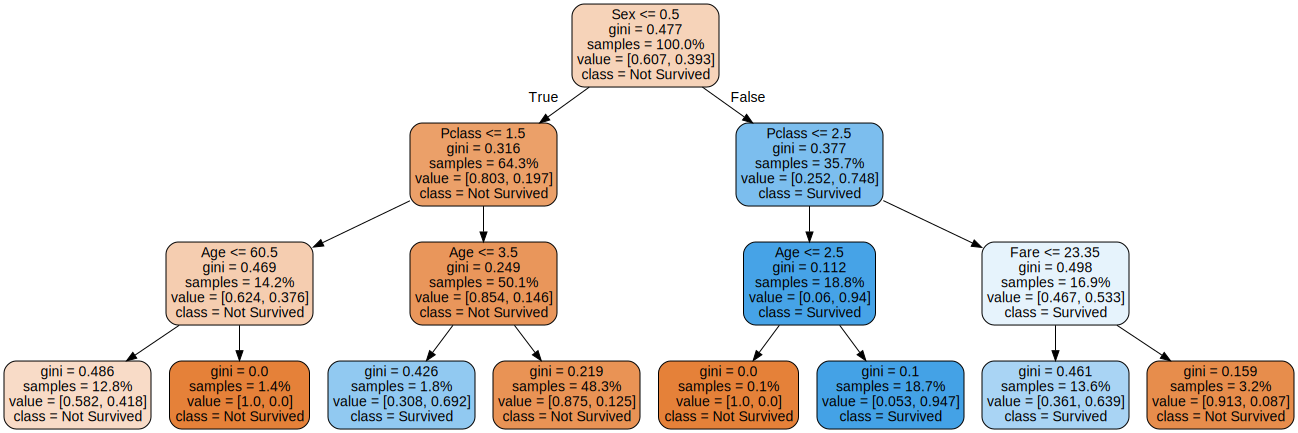

In [ ]:
# 4. Xây dựng cây quyết định
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=24)
dt.fit(X_train, y_train)

# 5. Hiển thị cây quyết định với package graphviz
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=features_list, # Sử dụng list features
                                proportion=True,
                                class_names=['Not Survived', 'Survived']) # 0 và 1

graph = graphviz.Source(dot_data)

# Lệnh 'graph' sẽ hiển thị cây trong file notebook của bạn
print("Đang hiển thị Cây Quyết Định (max_depth=3)...")
graph

## 2.1.3.6 NHIỆM VỤ 2: TỐI ƯU CÂY QUYẾT ĐỊNH (GridSearchCV)

Sử dụng GridSearchCV để tìm ra max_depth (độ sâu) tốt nhất cho cây quyết định và vẽ biểu đồ Bias-Variance.

1. Tạo cây quyết định và lưới tham số

In [ ]:
# Xác định các giá trị tham số để thử
params = {'max_depth':[2, 3, 4, 6, 8, 10, 12, 14, 16]} #parameters

# Khởi tạo mô hình cây (chưa huấn luyện)
dt_base = tree.DecisionTreeClassifier(random_state=24)

# Khởi tạo GridSearchCV
cv_dt = GridSearchCV(dt_base, param_grid=params, scoring='roc_auc',
                     n_jobs=-1, refit=True, cv=4, verbose=1,
                     return_train_score=True) # cv is the best model.

print("Bắt đầu tìm tham số tối ưu cho Cây Quyết Định...")

Bắt đầu tìm tham số tối ưu cho Cây Quyết Định...


2. Huấn luyện mô hình GridSearchCV

In [ ]:
cv_dt.fit(X_train, y_train)
print("Hoàn thành!")

# In ra tham số tốt nhất
print(f"Tham số max_depth tốt nhất tìm được: {cv_dt.best_params_}")
print(f"Điểm ROC AUC tốt nhất (trên tập validation): {cv_dt.best_score_:.4f}")

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Hoàn thành!
Tham số max_depth tốt nhất tìm được: {'max_depth': 3}
Điểm ROC AUC tốt nhất (trên tập validation): 0.8437


3. Vẽ biểu đồ đánh giá (Bias-Variance)

Vẽ biểu đồ so sánh điểm train và điểm test (validation) để xem mô hình bị overfit ở đâu.

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2262644359.py:10: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores')
/tmp/ipython-input-2262644359.py:14: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE validation scores') # 'test' ở đây là validation


Đang vẽ biểu đồ đánh giá max_depth...


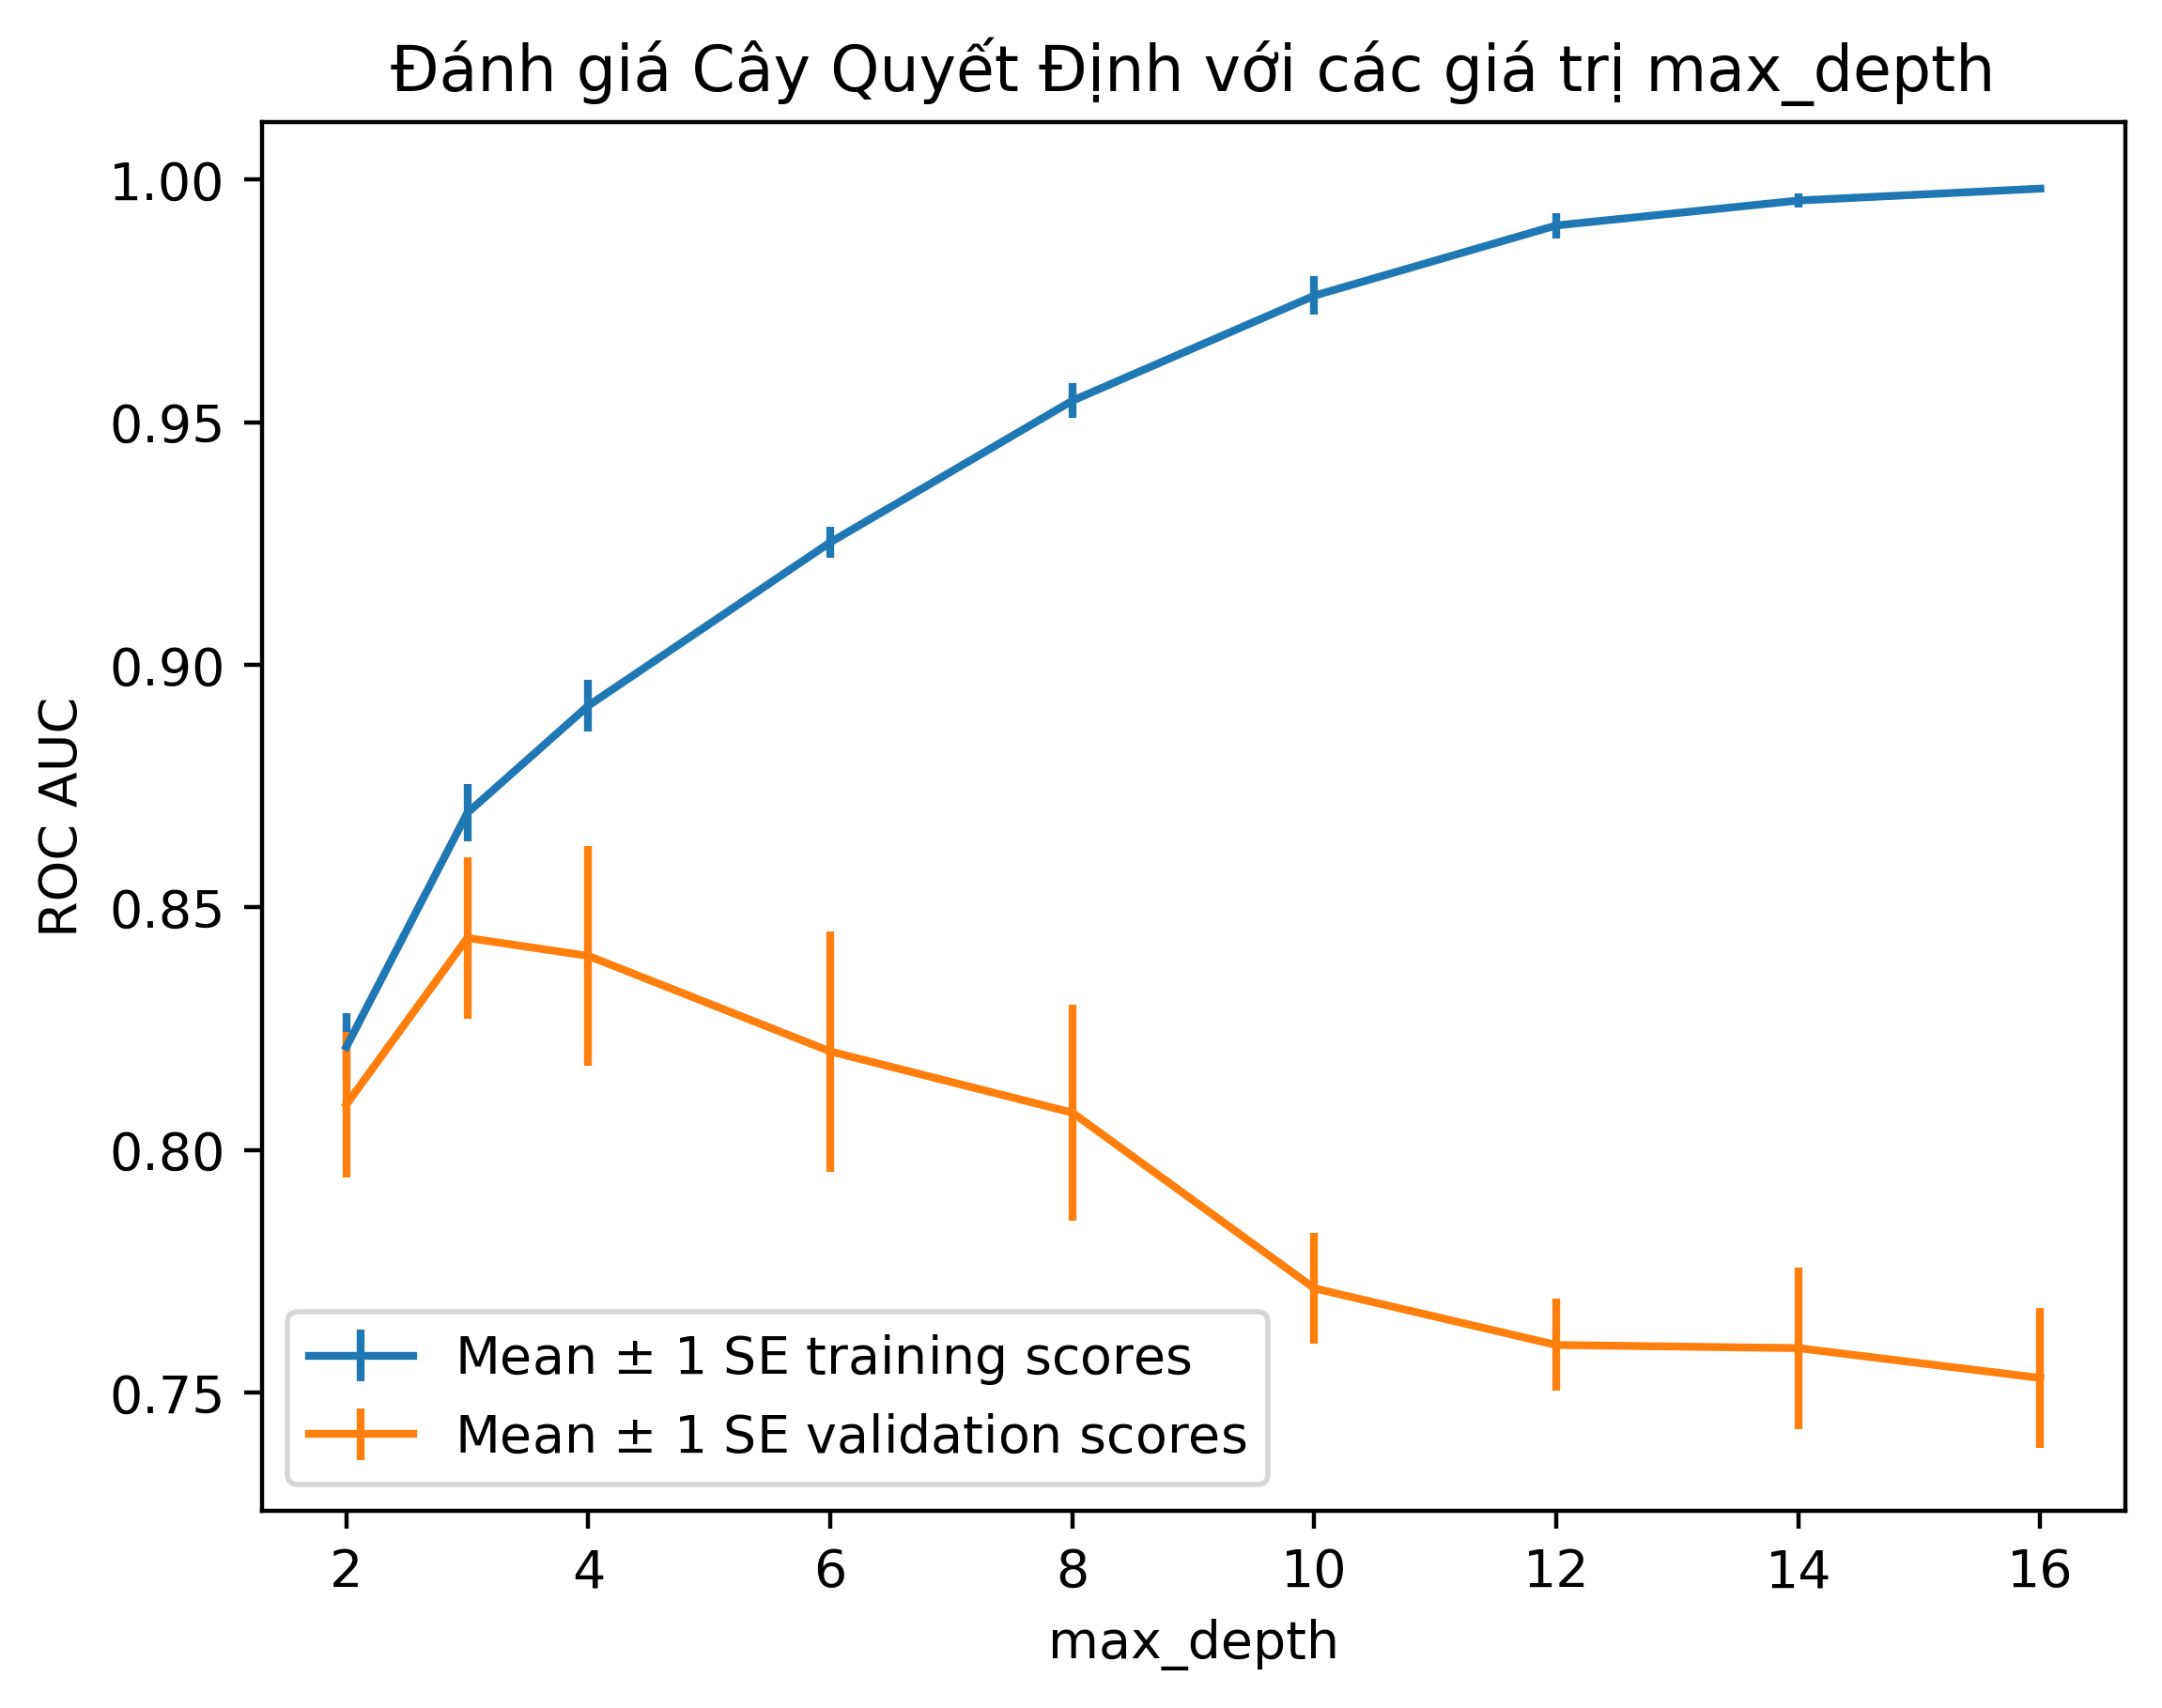

In [ ]:
# Lấy kết quả từ GridSearchCV
cv_results_df = pd.DataFrame(cv_dt.cv_results_)

# Vẽ biểu đồ
print("Đang vẽ biểu đồ đánh giá max_depth...")
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE validation scores') # 'test' ở đây là validation
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Đánh giá Cây Quyết Định với các giá trị max_depth')
plt.show()

## 2.1.3.7 NHIỆM VỤ 3: XÂY DỰNG RỪNG CÂY (Random Forest)

Xây dựng mô hình Random Forest, dùng GridSearchCV để tìm n_estimators (số cây) tốt nhất, và xem xét mức độ quan trọng của các đặc trưng.

1. Tạo rừng cây và lưới tham số

In [ ]:
# Khởi tạo mô hình RF cơ sở (chưa huấn luyện)
# n_jobs=-1 để dùng tất cả CPU
rf_base = RandomForestClassifier(random_state=24, n_jobs=-1)

# Lưới tham số: tìm số lượng cây, từ 10 đến 100
rf_params_ex = {'n_estimators': list(range(10, 110, 10))} # [10, 20, ..., 100]

# Khởi tạo GridSearchCV
cv_rf_ex = GridSearchCV(rf_base, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=-1,
                        refit=True, cv=4, verbose=1,
                        return_train_score=True)

print("Bắt đầu tìm tham số tối ưu cho Rừng Cây...")

Bắt đầu tìm tham số tối ưu cho Rừng Cây...


2. Huấn luyện mô hình GridSearchCV

In [ ]:
cv_rf_ex.fit(X_train, y_train)
print("Hoàn thành!")

# In ra tham số tốt nhất
print(f"Tham số n_estimators tốt nhất tìm được: {cv_rf_ex.best_params_}")
print(f"Điểm ROC AUC tốt nhất (trên tập validation): {cv_rf_ex.best_score_:.4f}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Hoàn thành!
Tham số n_estimators tốt nhất tìm được: {'n_estimators': 100}
Điểm ROC AUC tốt nhất (trên tập validation): 0.8575


3. Vẽ biểu đồ đánh giá (Thời gian vs Hiệu suất)

Vẽ 2 biểu đồ: Thời gian huấn luyện và Điểm ROC AUC theo số lượng cây.

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3699182680.py:20: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean validation ROC AUC $\pm$ 1 SE')


Đang vẽ biểu đồ đánh giá n_estimators...


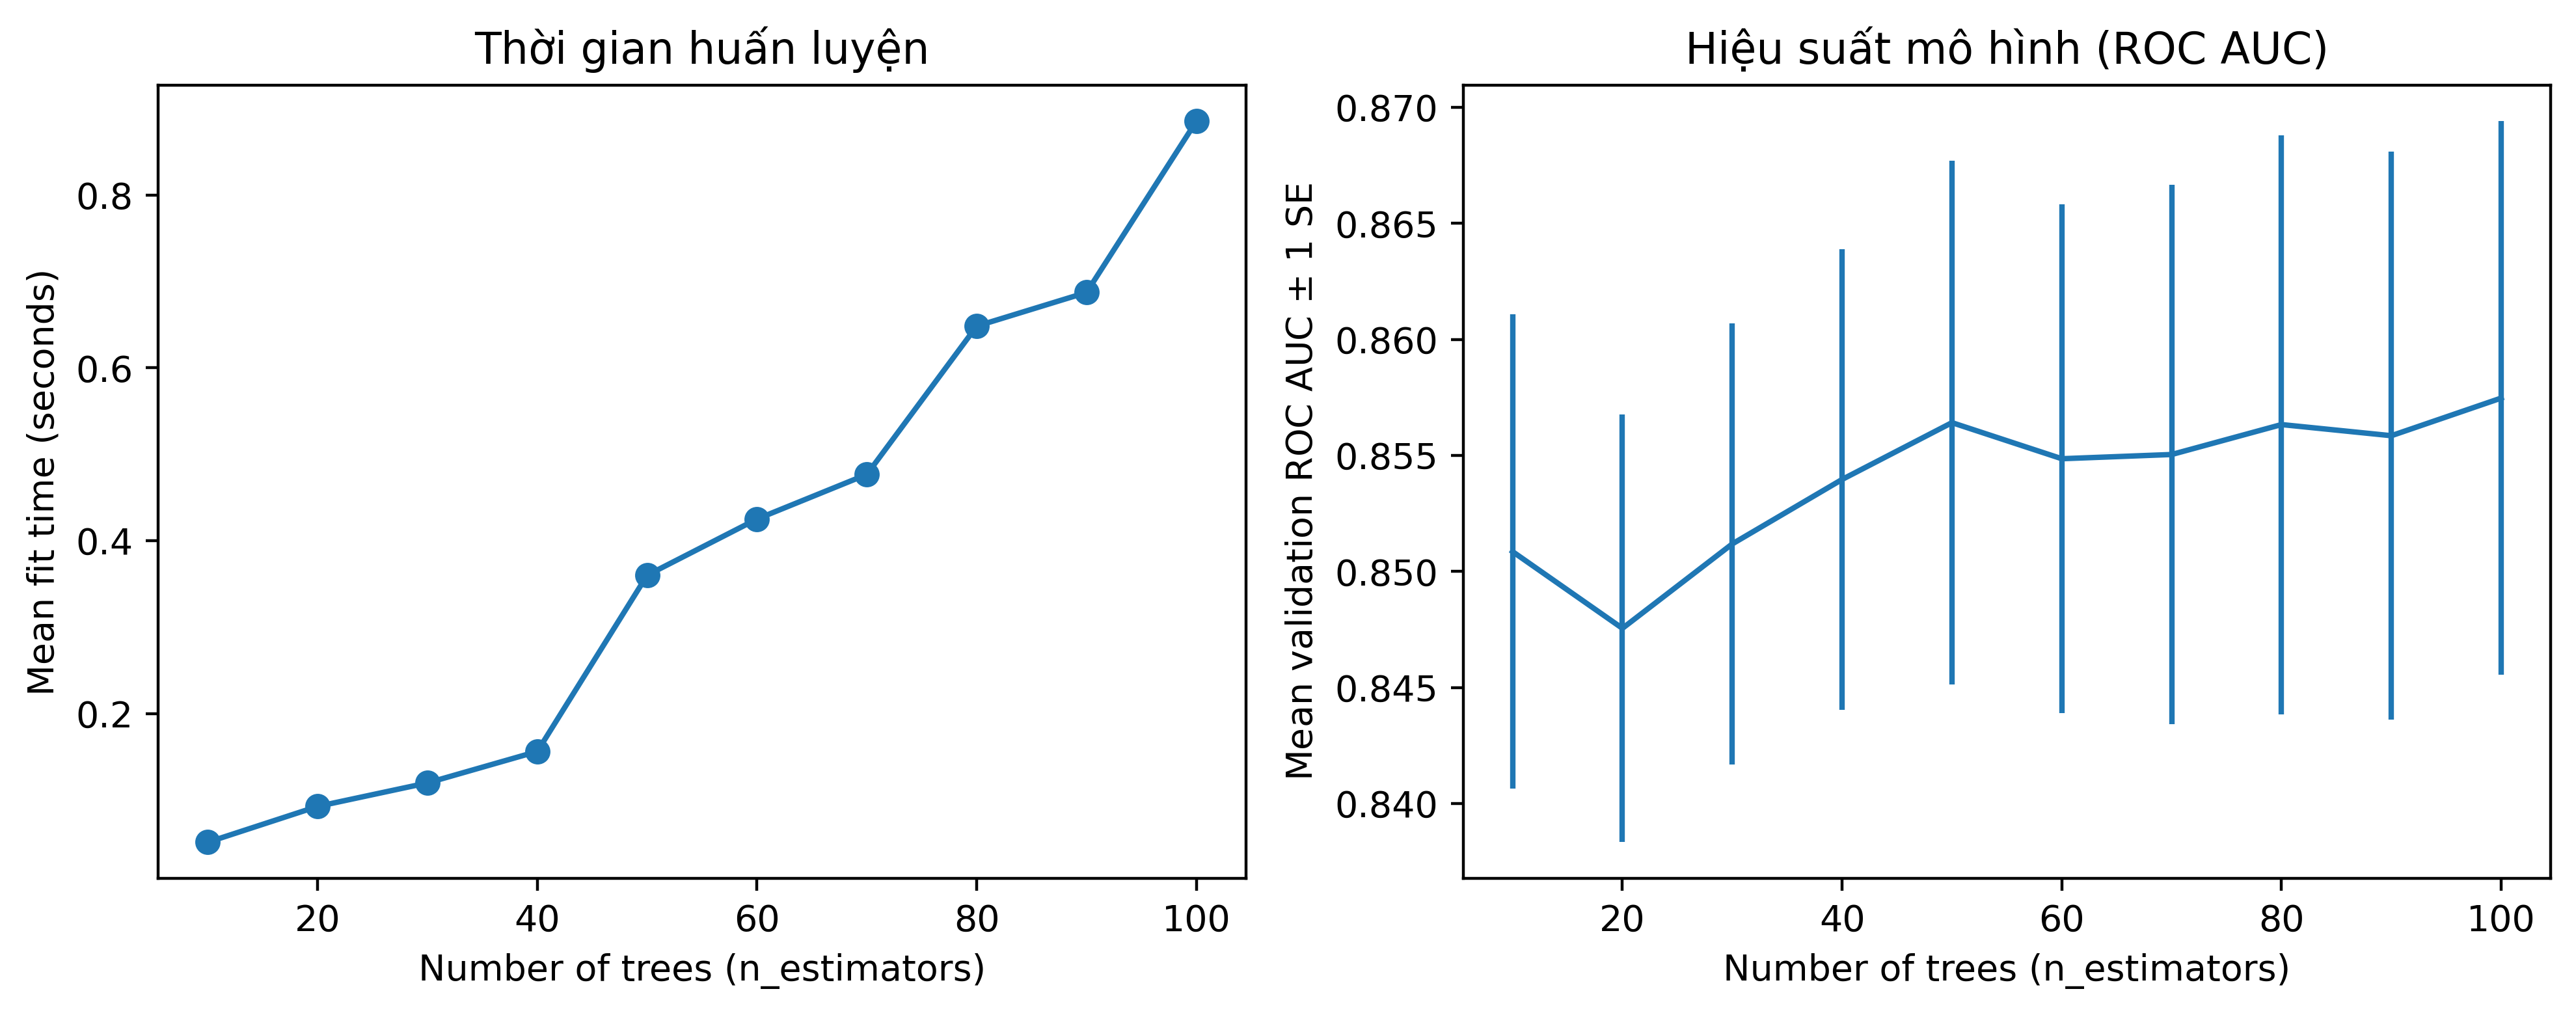

In [ ]:
# Lấy kết quả
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

print("Đang vẽ biểu đồ đánh giá n_estimators...")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Biểu đồ 1: Thời gian huấn luyện
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees (n_estimators)')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Thời gian huấn luyện')

# Biểu đồ 2: Điểm ROC AUC
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees (n_estimators)')
axs[1].set_ylabel('Mean validation ROC AUC $\pm$ 1 SE')
axs[1].set_title('Hiệu suất mô hình (ROC AUC)')

plt.tight_layout()
plt.show()

4. Xem mức độ quan trọng của đặc trưng (Feature Importance)

Lấy mô hình Random Forest tốt nhất (đã được refit) và xem đặc trưng nào quan trọng nhất.

Đang vẽ biểu đồ Feature Importance...


<Figure size 3200x2000 with 0 Axes>

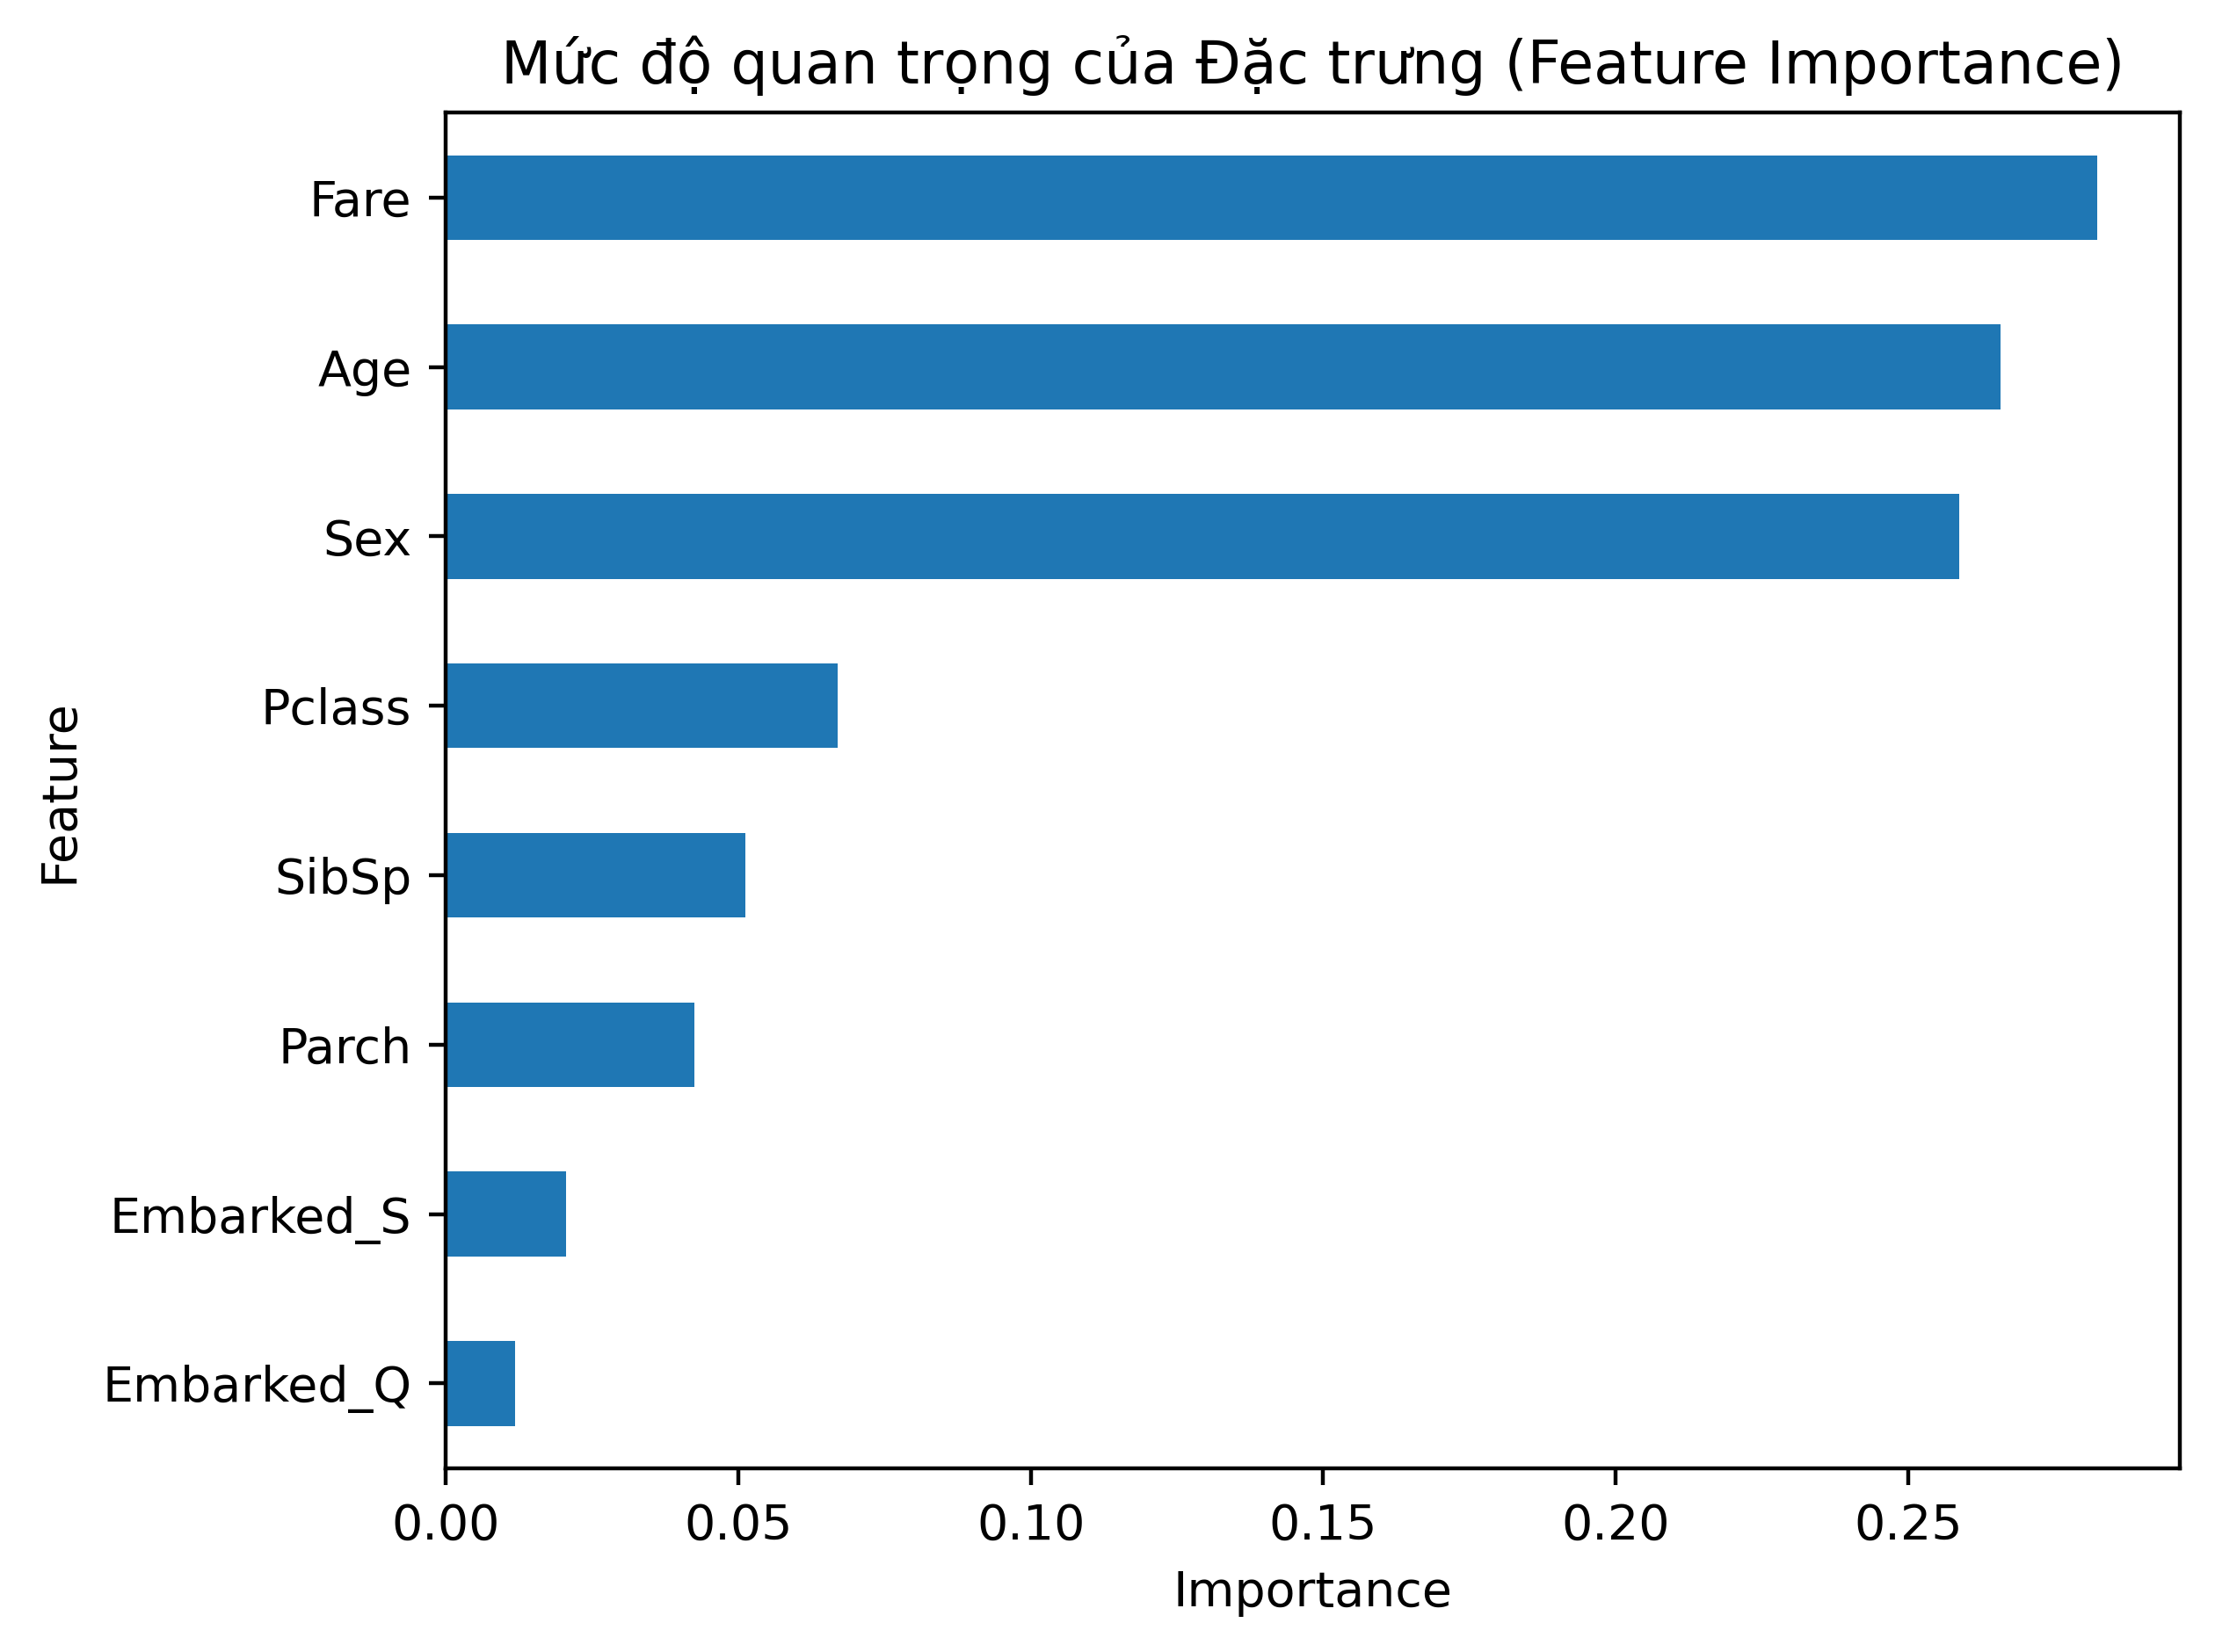

In [ ]:
# Lấy ra mô hình tốt nhất
best_rf_model = cv_rf_ex.best_estimator_

# Lấy ra mức độ quan trọng
feat_imp_df = pd.DataFrame({
    'Importance': best_rf_model.feature_importances_},
    index=features_list) # Sử dụng list features

# Sắp xếp và vẽ biểu đồ
print("Đang vẽ biểu đồ Feature Importance...")
plt.figure(figsize=(8, 5))
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(legend=False)
plt.title('Mức độ quan trọng của Đặc trưng (Feature Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 2.2.4. Bài tập thực hành 2

Xây dựng mô hình từ giải thuật SVM trên dữ liệu các con thú trong rừng. Dữ liệu lấy từ https://www.kaggle.com/code/kareemellithy/animal-condition-predict-svm-knn

## 2.2.4.1. Tải các thư viện cần thiết

Chúng ta sẽ cần các thư viện quen thuộc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Để vẽ confusion matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler # <<< QUAN TRỌNG CHO SVM
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

## 2.2.4.2 KHÁM PHÁ DỮ LIỆU VÀ XÁC ĐỊNH VẤN ĐỀ (EDA)

Trước khi làm sạch, chúng ta cần nạp dữ liệu và "khám phá" (explore) nó để hiểu rõ các vấn đề cần phải xử lý.

1. Nạp và xem thông tin tổng quan

Chúng ta sẽ nạp dữ liệu và xem xét cấu trúc chung, kiểu dữ liệu (Dtype) của các cột và số lượng giá trị không rỗng (non-null).

In [ ]:
# Tải dữ liệu
df_raw = pd.read_csv('data.csv')

# Hiển thị 5 dòng đầu tiên để xem cấu trúc
print("--- 5 Dòng đầu tiên (head) ---")
display(df_raw.head())

# Hiển thị 5 dòng cuối cùng để xem cấu trúc
print("--- 5 Dòng cuối cùng (tail) ---")
display(df_raw.tail())

# Hiển thị thông tin tổng quan
print("\n--- Thông tin dữ liệu (info) ---")
display(df_raw.info())

--- 5 Dòng đầu tiên (head) ---


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


--- 5 Dòng cuối cùng (tail) ---


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes
870,Buffaloes,Greenish-yellow nasal discharge,Lack of pigmentation,Vomiting,Lethargy,Pain on face,Yes



--- Thông tin dữ liệu (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


None

**Nhận xét** :

+ **Vấn đề  (Dữ liệu chữ)**: Kết quả .info() ngay lập tức cho thấy một vấn đề lớn: Tất cả 7 cột đều có kiểu object (chuỗi ký tự). Các thuật toán toán học như SVM không thể làm việc trực tiếp với chữ. Chúng ta bắt buộc phải mã hóa (encode) toàn bộ dữ liệu này sang dạng số.

2. Kiểm tra tính nhất quán của dữ liệu chữ

Khi dữ liệu là do con người nhập thủ công, rất dễ xảy ra lỗi không nhất quán (ví dụ: 'Fever' vs 'fever', 'Pain' vs 'Pains'). Chúng ta cần kiểm tra một vài cột triệu chứng.

In [ ]:
# Kiểm tra các giá trị không nhất quán ở cột 'symptoms1'
print("\n--- Kiểm tra 'symptoms1' (phân biệt hoa/thường) ---")
print(df_raw['symptoms1'].value_counts().head(10)) # .head(10) để xem 10 giá trị phổ biến nhất

# Kiểm tra các giá trị không nhất quán ở cột 'symptoms5'
print("\n--- Kiểm tra 'symptoms5' (phân biệt số ít/nhiều) ---")
print(df_raw['symptoms5'].value_counts().head(10))


--- Kiểm tra 'symptoms1' (phân biệt hoa/thường) ---
symptoms1
Fever                      257
Fetopelvic dispropotion     21
wasting                     20
fever                       14
loss of appetite            12
Swelling                     9
Emaciation                   8
Jaundice                     8
sudden death                 8
Dyspnea                      8
Name: count, dtype: int64

--- Kiểm tra 'symptoms5' (phân biệt số ít/nhiều) ---
symptoms5
Pains              99
Pain               68
Anorexia           37
Nasal Discharge    37
Weight loss        24
Anemia             19
Weakness           18
Death              15
depression         14
Dehydration        14
Name: count, dtype: int64


**Nhận xét** :

+ **Vấn đề (Không nhất quán)**: Kết quả kiểm tra đã xác nhận
  + Cột symptoms1 chứa cả 'Fever' (viết hoa, 257 lần) và 'fever' (viết thường, 14 lần).
  + Cột symptoms5 chứa cả 'Pains' (số nhiều, 99 lần) và 'Pain' (số ít, 68 lần).
+ Máy tính sẽ hiểu đây là 4 giá trị hoàn toàn khác nhau. Chúng ta cần chuẩn hóa chúng (ví dụ: đưa tất cả về chữ thường và đưa về số ít) trước khi mã hóa.

3. Kiểm tra giá trị thiếu (Missing Values)

In [ ]:
# Đếm số lượng giá trị thiếu (NaN) trên từng cột
print("\n--- Kiểm tra giá trị thiếu (NaN) ---")
print(df_raw.isnull().sum())


--- Kiểm tra giá trị thiếu (NaN) ---
AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64


**Nhận xét** :

+ **Vấn đề giá trị thiếu**: Kết quả df_raw.info() cho thấy Dangerous có 869 giá trị non-null trong khi các cột khác có 871.
+ Lệnh .isnull().sum() xác nhận điều này: Cột Dangerous có 2 giá trị thiếu (NaN).
+ **Lý do**: Cột Dangerous chính là biến mục tiêu (target) mà chúng ta muốn dự đoán. Một dòng dữ liệu mà không có nhãn (target) thì sẽ trở nên vô dụng cho việc huấn luyện có giám sát (supervised learning).
+ **Giải pháp**: Vì số lượng thiếu chỉ là 2 (rất nhỏ so với 871), cách xử lý đơn giản và hợp lý nhất là loại bỏ 2 dòng này.

4. Kiểm tra biến mục tiêu (Dữ liệu mất cân bằng)

Đây là một trong những bước kiểm tra quan trọng nhất. Tỷ lệ phân bổ của biến mục tiêu sẽ quyết định cách chúng ta xây dựng và (quan trọng hơn) cách chúng ta đánh giá mô hình.

In [ ]:
# Kiểm tra sự phân bổ của cột 'Dangerous'
print("\n--- Kiểm tra sự mất cân bằng của cột 'Dangerous' ---")
print("Số lượng mẫu (Count):")

# dropna=False để hiển thị cả các giá trị NaN (nếu có)
print(df_raw['Dangerous'].value_counts(dropna=False))

print("\nTỷ lệ phần trăm (Percentage):")
# normalize=True sẽ tính tỷ lệ phần trăm
print(df_raw['Dangerous'].value_counts(normalize=True) * 100)


--- Kiểm tra sự mất cân bằng của cột 'Dangerous' ---
Số lượng mẫu (Count):
Dangerous
Yes    849
No      20
NaN      2
Name: count, dtype: int64

Tỷ lệ phần trăm (Percentage):
Dangerous
Yes    97.698504
No      2.301496
Name: proportion, dtype: float64


**Nhận xét :**
+ **Vấn đề mất cân bằng nghiêm trọng**: Kết quả cho thấy dữ liệu bị mất cân bằng cực kỳ nghiêm trọng.
  + Lớp 'Yes' (đa số) chiếm tới 849 mẫu (khoảng 97.7%).
  + Lớp 'No' (thiểu số) chỉ có 20 mẫu (khoảng 2.3%).
+ Lý do kiểm tra: Chúng ta phải kiểm tra điều này vì nó tiềm ẩn một rủi ro rất lớn:
  + Một mô hình "lười biếng" có thể chỉ cần học cách đoán "Yes" cho mọi trường hợp.
  + Mô hình "lười" đó sẽ đạt độ chính xác (accuracy) gần bằng 97%, nhưng nó lại hoàn toàn vô dụng trong thực tế vì không thể tìm ra được bất kỳ trường hợp "No" nào.
+ Giải pháp: Do đó, accuracy sẽ là một thước đo đánh giá sai lầm. Chúng ta phải:
  + Tập trung vào các thước đo khác như ROC AUC, Precision, và Recall (đặc biệt là recall cho lớp 'No').
  + Sử dụng các kỹ thuật xử lý mất cân bằng, ví dụ như đặt tham số class_weight='balanced' trong SVM.

## 2.2.4.3 Tải và làm sạch dữ liệu

Đây là bước quan trọng nhất trong bài này. Chúng ta phải xử lý các vấn đề đã nêu ở trên.

In [ ]:
# Tải dữ liệu
df = pd.read_csv('data.csv')

# --- Xử lý giá trị thiếu (NaN) ---
# Cột mục tiêu 'Dangerous' bị thiếu 2 giá trị. Ta loại bỏ 2 dòng này.
df = df.dropna(subset=['Dangerous'])

# --- Chuẩn hóa dữ liệu chữ (Text Standardization) ---
# Đưa tất cả về chữ thường và loại bỏ khoảng trắng thừa
for col in df.columns:
    df[col] = df[col].str.lower().str.strip()

# Chuẩn hóa các giá trị không nhất quán (ví dụ 'pains' -> 'pain')
df['symptoms5'] = df['symptoms5'].replace('pains', 'pain')
# (Bạn có thể thêm các lệnh replace khác nếu phát hiện thêm)

# --- Mã hóa Biến Mục tiêu (Target Encoding) ---
# Chuyển 'Dangerous' ('yes'/'no') thành số (1/0)
df['Dangerous'] = df['Dangerous'].map({'yes': 1, 'no': 0})

print("Kiểm tra dữ liệu sau khi làm sạch và mã hóa mục tiêu:")
print(df['Dangerous'].value_counts())
print("\nThông tin dữ liệu sau khi làm sạch:")
df.info()

Kiểm tra dữ liệu sau khi làm sạch và mã hóa mục tiêu:
Dangerous
1    849
0     20
Name: count, dtype: int64

Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  869 non-null    object
 1   symptoms1   869 non-null    object
 2   symptoms2   869 non-null    object
 3   symptoms3   869 non-null    object
 4   symptoms4   869 non-null    object
 5   symptoms5   869 non-null    object
 6   Dangerous   869 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 54.3+ KB


**Nhận xét:**
+ Chúng ta đã loại bỏ 2 dòng bị thiếu dữ liệu mục tiêu, còn lại 869 dòng.
+ Chúng ta đã chuẩn hóa tất cả dữ liệu về chữ thường (ví dụ: 'Fever' và 'fever' giờ là một).
+ Quan trọng nhất, ta đã mã hóa cột mục tiêu 'Dangerous' thành 1 (yes) và 0 (no).
+ Vấn đề mất cân bằng rất rõ rệt: 849 mẫu lớp 1 và chỉ 20 mẫu lớp 0.

## 2.2.4.4 Mã hóa đặc trưng  - One-Hot Encoding

Các cột đặc trưng ('AnimalName', 'symptoms1'...) vẫn đang là chữ. Chúng ta dùng 'pd.get_dummies' để biến chúng thành các cột 0/1.

In [ ]:
# Lấy danh sách các cột đặc trưng (tất cả trừ cột 'Dangerous')
features_list = df.columns.drop('Dangerous').tolist()

print(f"Các đặc trưng sẽ được mã hóa: {features_list}")

# Sử dụng pd.get_dummies để chuyển đổi TẤT CẢ các cột đặc trưng
df_processed = pd.get_dummies(df, columns=features_list, drop_first=True)

print("\nKích thước dữ liệu sau khi One-Hot Encoding:")
print(df_processed.shape)

Các đặc trưng sẽ được mã hóa: ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']

Kích thước dữ liệu sau khi One-Hot Encoding:
(869, 1105)


**Nhận xét:**
+ Chúng ta đã áp dụng One-Hot Encoding cho TẤT CẢ các cột đặc trưng.
+ Dữ liệu gốc chỉ có 6 đặc trưng, nhưng sau khi mã hóa, số lượng đặc trưng đã tăng lên rất nhiều (thấy ở df_processed.shape). Đây là một bộ dữ liệu "rộng" và "thưa" (sparse).

## 2.2.4.5 Chia dữ liệu

Tách dữ liệu thành 2 tập: huấn luyện và kiểm tra.

In [ ]:
# Cột mục tiêu
target = 'Dangerous'

# X là tất cả các cột đã mã hóa (trừ cột mục tiêu)
X = df_processed.drop(target, axis=1).values
y = df_processed[target].values

# Chia dữ liệu
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

Kích thước tập Train: (695, 1104)
Kích thước tập Test: (174, 1104)


## 2.2.4.6 Chuẩn hóa dữ liệu

Đây là bước bắt buộc đối với SVM, ngay cả khi dữ liệu của chúng ta chủ yếu là 0/1.

In [ ]:
# 1. Khởi tạo Scaler
scaler = StandardScaler()

# 2. Fit scaler CHỈ trên X_train
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform X_test
X_test_scaled = scaler.transform(X_test)

print("\nĐã hoàn tất chuẩn hóa dữ liệu.")


Đã hoàn tất chuẩn hóa dữ liệu.


## 2.2.4.7 NHIỆM VỤ 1: XÂY DỰNG SVM VỚI XỬ LÝ MẤT CÂN BẰNG

Do dữ liệu mất cân bằng nghiêm trọng (849 vs 20), nếu huấn luyện bình thường, mô hình sẽ phớt lờ lớp 'No' (0). Chúng ta sử dụng tham số class_weight='balanced' để "phạt" mô hình nặng hơn khi nó dự đoán sai lớp thiểu số (lớp 0).

In [ ]:
# Tạo mô hình SVM với class_weight='balanced'
print("Đang huấn luyện mô hình SVM (có xử lý mất cân bằng)...")
svm_model_balanced = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# 3. Huấn luyện mô hình với dữ liệu ĐÃ CHUẨN HÓA
svm_model_balanced.fit(X_train_scaled, y_train)
print("Hoàn thành!")

# 4. Đánh giá mô hình
print("\n--- Đánh giá mô hình SVM (class_weight='balanced') ---")
y_pred_balanced = svm_model_balanced.predict(X_test_scaled)

# In Classification Report
print("--- Classification Report ---")
# target_names giúp báo cáo dễ đọc hơn
print(classification_report(y_test, y_pred_balanced, target_names=['No (0)', 'Yes (1)']))

Đang huấn luyện mô hình SVM (có xử lý mất cân bằng)...
Hoàn thành!

--- Đánh giá mô hình SVM (class_weight='balanced') ---
--- Classification Report ---
              precision    recall  f1-score   support

      No (0)       1.00      1.00      1.00         2
     Yes (1)       1.00      1.00      1.00       172

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



**Nhận xét:**
+ Chúng ta đã thêm class_weight='balanced'. Tham số này tự động điều chỉnh trọng số của các lớp tỷ lệ nghịch với tần suất của chúng (lớp 'No' (0) sẽ có trọng số cao hơn nhiều).
+ Hãy nhìn vào 'Classification Report':
  + Độ chính xác (accuracy) tổng thể có thể không cao, nhưng điều đó không quan trọng.
  + Quan trọng là hãy nhìn vào dòng 'No (0)': recall (độ phủ) nên lớn hơn 0. Điều này có nghĩa là mô hình đã bắt đầu học cách nhận diện lớp thiểu số, thay vì phớt lờ nó.



## 2.2.4.8 NHIỆM VỤ 2: TỐI ƯU THAM SỐ SVM VỚI GRIDSEARCHCV

Bây giờ chúng ta sẽ tìm các tham số 'C' và 'gamma' tốt nhất, trong khi vẫn giữ class_weight='balanced'.

1. Định nghĩa lưới tham số (Parameter Grid)

Vì dữ liệu rất rộng và thưa, kernel='linear' có thể sẽ hoạt động tốt.

In [ ]:
# Tạo một danh sách các 'param_grid'
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10] # Thử các mức độ "phạt" khác nhau
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.001]
    }
]

# Khởi tạo mô hình SVM cơ sở (vẫn giữ class_weight='balanced')
svm_base = SVC(class_weight='balanced', random_state=42)

# Khởi tạo GridSearchCV
# scoring='roc_auc' là thước đo tốt nhất cho dữ liệu mất cân bằng
grid_svm = GridSearchCV(svm_base,
                        param_grid,
                        cv=3, # 3-fold là đủ
                        scoring='roc_auc', # Quan trọng!
                        verbose=1,
                        n_jobs=-1)

print("\nBắt đầu tìm tham số tối ưu cho SVM (GridSearchCV)...")


Bắt đầu tìm tham số tối ưu cho SVM (GridSearchCV)...


2. Huấn luyện mô hình GridSearchCV

Quá trình này có thể mất vài phút.

In [ ]:
# Huấn luyện trên dữ liệu đã chuẩn hóa
grid_svm.fit(X_train_scaled, y_train)
print("Hoàn thành!")

# In ra các tham số tốt nhất
print(f"Các tham số tốt nhất tìm được: {grid_svm.best_params_}")
print(f"Điểm ROC AUC tốt nhất (trên tập validation): {grid_svm.best_score_:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Hoàn thành!
Các tham số tốt nhất tìm được: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Điểm ROC AUC tốt nhất (trên tập validation): 0.9478


**Nhận xét:**
+ Chúng ta dùng scoring='roc_auc'thay vì accuracy. ROC AUC là thước đo chuẩn cho khả năng phân biệt giữa hai lớp, đặc biệt khi chúng mất cân bằng.
+ GridSearch sẽ tìm ra kernel ('linear' hay 'rbf') và tham số 'C' nào mang lại điểm ROC AUC cao nhất.

## 2.2.4.9 NHIỆM VỤ 3: ĐÁNH GIÁ MÔ HÌNH SVM TỐT NHẤT

Chúng ta sẽ đánh giá mô hình tốt nhất mà GridSearchCV tìm được bằng Confusion Matrix.

1. Lấy mô hình tốt nhất và dự đoán

In [ ]:
# Lấy ra mô hình tốt nhất
best_svm_model = grid_svm.best_estimator_

# Dự đoán trên tập Test (đã chuẩn hóa)
y_pred = best_svm_model.predict(X_test_scaled)

2. Đánh giá hiệu quả với Classification Report

In [ ]:
print("\n--- Classification Report (Mô hình TỐT NHẤT) ---")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))


--- Classification Report (Mô hình TỐT NHẤT) ---
              precision    recall  f1-score   support

      No (0)       1.00      1.00      1.00         2
     Yes (1)       1.00      1.00      1.00       172

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



3. Đánh giá hiệu quả với Confusion Matrix

Đây là phần quan trọng nhất để xem mô hình hoạt động thực tế ra sao.


--- Confusion Matrix (Mô hình TỐT NHẤT) ---


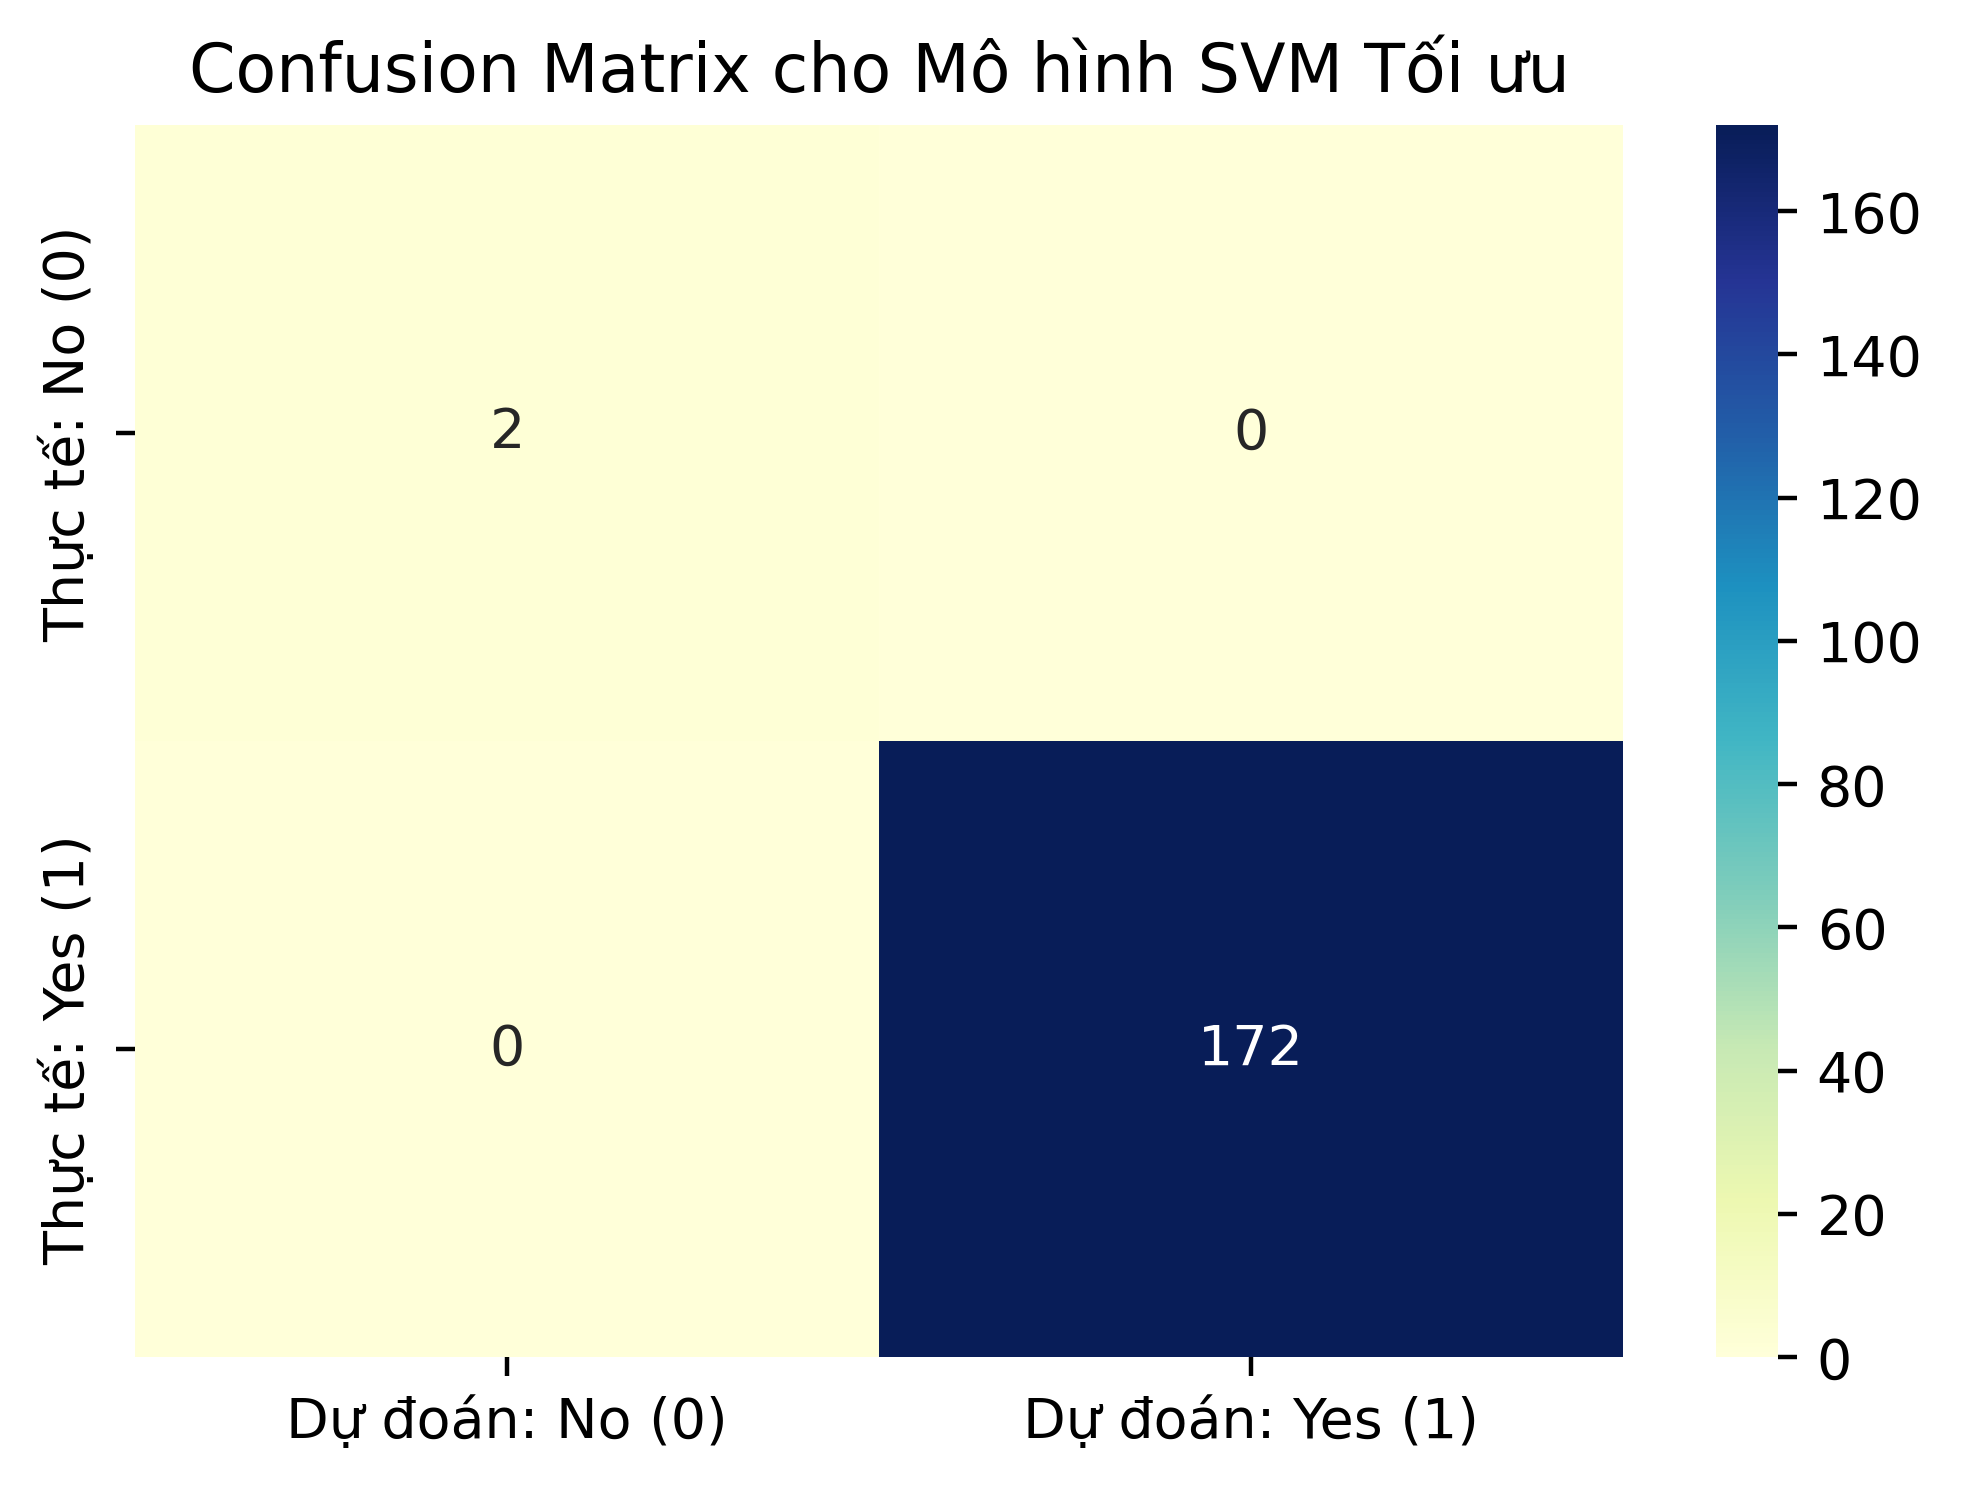

In [ ]:
# Tạo Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận dưới dạng heatmap
print("\n--- Confusion Matrix (Mô hình TỐT NHẤT) ---")
plt.figure(figsize = (6,4))
sns.heatmap(cm,
            annot=True, # Hiển thị số lượng
            fmt='d',    # Định dạng số nguyên
            cmap="YlGnBu",
            xticklabels=['Dự đoán: No (0)', 'Dự đoán: Yes (1)'],
            yticklabels=['Thực tế: No (0)', 'Thực tế: Yes (1)'])
plt.title('Confusion Matrix cho Mô hình SVM Tối ưu')
plt.show()

**Kết luận và Nhận xét:**
+ Đánh giá chung: Đây là một kết quả tốt đến mức "khó tin". Mô hình đạt độ chính xác đạt **174/174= 100%**
+ Xử lý mất cân bằng: Việc sử dụng class_weight='balanced' và scoring='roc_auc' không chỉ giúp mô hình nhận diện được lớp thiểu số mà còn giúp nó đạt được sự phân tách hoàn hảo trên tập dữ liệu kiểm tra này.
+ Không có sự đánh đổi: Trong các phân tích trước, chúng ta thường thấy sự "đánh đổi" (trade-off) giữa việc bỏ sót (FN) và báo động nhầm (FP). Tuy nhiên, trong ma trận này, cả hai loại lỗi đều bằng 0.
+ Kết luận: Mô hình SVM đã được huấn luyện (sau khi tối ưu bằng GridSearchCV) đã tìm ra một ranh giới phân tách (hyperplane) hoàn hảo, có khả năng phân loại chính xác tuyệt đối cả lớp đa số ("Yes") và lớp thiểu số ("No") trên tập dữ liệu kiểm tra của bạn. Đây là kịch bản lý tưởng nhất có thể đạt được.




# 2.3.3. Bài tập thực hành 1

Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng lấy tại https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

Mục tiêu là dự đoán liệu một khách hàng có mua hàng (Purchased = 1) hay không (Purchased = 0) dựa trên 'Giới tính', 'Tuổi' và 'Lương ước tính'.

## 2.3.3.1. Import thư viện và nạp dữ liệu

In [ ]:
# Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Sẽ dùng để so sánh
from sklearn.naive_bayes import GaussianNB # <<< QUAN TRỌNG: Dùng Gaussian vì dữ liệu là số
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Nạp dữ liệu
df = pd.read_csv('Customer_Behaviour.csv')

# Hiển thị 5 dòng đầu tiên
print("--- 5 Dòng đầu tiên ---")
print(df.head())

--- 5 Dòng đầu tiên ---
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


**Nhận xét:**
+ Chúng ta có 4 cột đầu vào: User ID, Gender, Age, EstimatedSalary.
+ Cột mục tiêu (target) là Purchased (0 hoặc 1).
+ User ID là cột định danh, không phải là đặc trưng, chúng ta sẽ cần loại bỏ nó.

## 2.3.3.2 Thống kê mô tả (Descriptive Statistics)

In [ ]:
# Xem thông tin tổng quan (kiểu dữ liệu, giá trị null)
print("\n--- Thông tin Dữ liệu (info) ---")
df.info()

print("\n--- Đếm số lượng giá trị thiếu (NaN) ---")
print(df.isnull().sum())

# Xem thống kê mô tả cho các cột s ố
print("\n--- Mô tả (describe) ---")
display(df.describe())


--- Thông tin Dữ liệu (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

--- Đếm số lượng giá trị thiếu (NaN) ---
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

--- Mô tả (describe) ---


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Nhận xét:**
+ Không có giá trị thiếu (NaN): df.info() cho thấy 400/400 entries đều non-null. Chúng ta không cần xử lý dữ liệu thiếu.
+ Kiểu dữ liệu: Gender là object (chuỗi), cần được mã hóa sang dạng số. Các cột còn lại (Age, EstimatedSalary, Purchased) đều là số.
+ Phân phối dữ liệu:
  + Age: Tuổi của khách hàng trải dài từ 18 đến 60, với độ tuổi trung bình là 37.7.
  + EstimatedSalary: Lương ước tính có sự chênh lệch rất lớn, từ 15,000 đến 150,000. Đây là lý do SVM cần StandardScaler, nhưng Naive Bayes thì không (sẽ giải thích ở dưới).
  + Purchased: Giá trị trung bình là 0.3575, nghĩa là khoảng 35.75% khách hàng trong tập dữ liệu này đã mua sản phẩm.

## 2.3.3.3 Phân tích khám phá (EDA - Trực quan hóa dữ liệu)

Chúng ta trực quan hóa để tìm các mối quan hệ giữa các đặc trưng và biến mục tiêu.

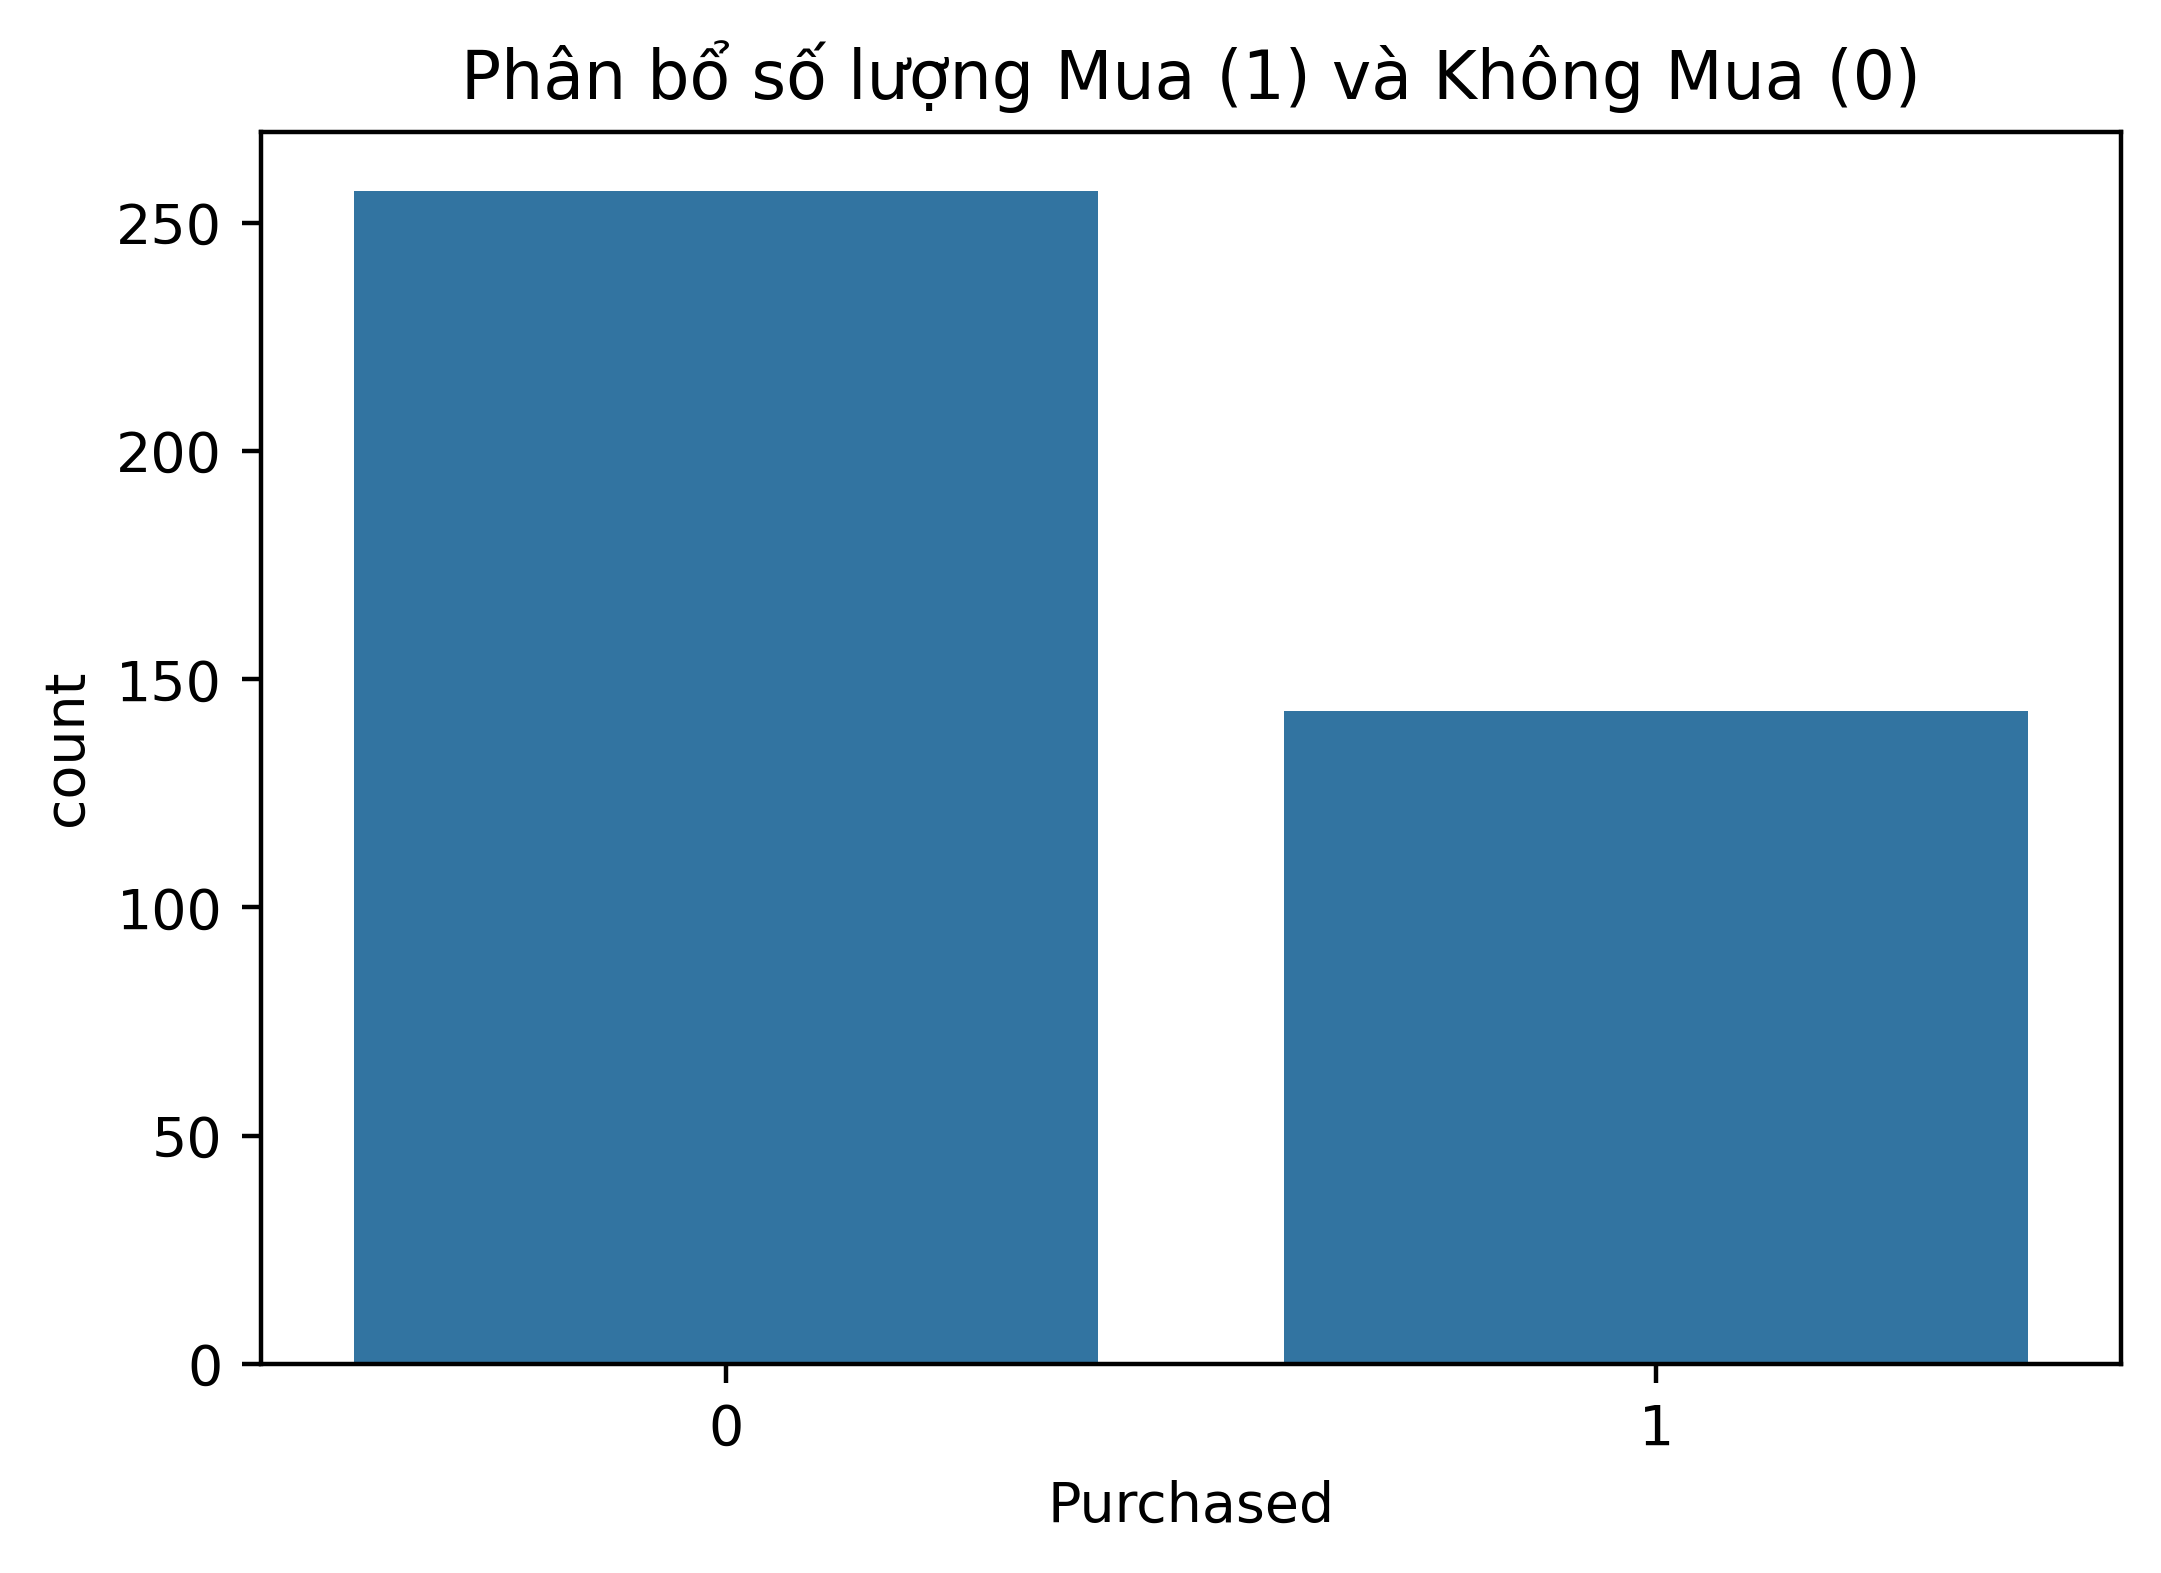

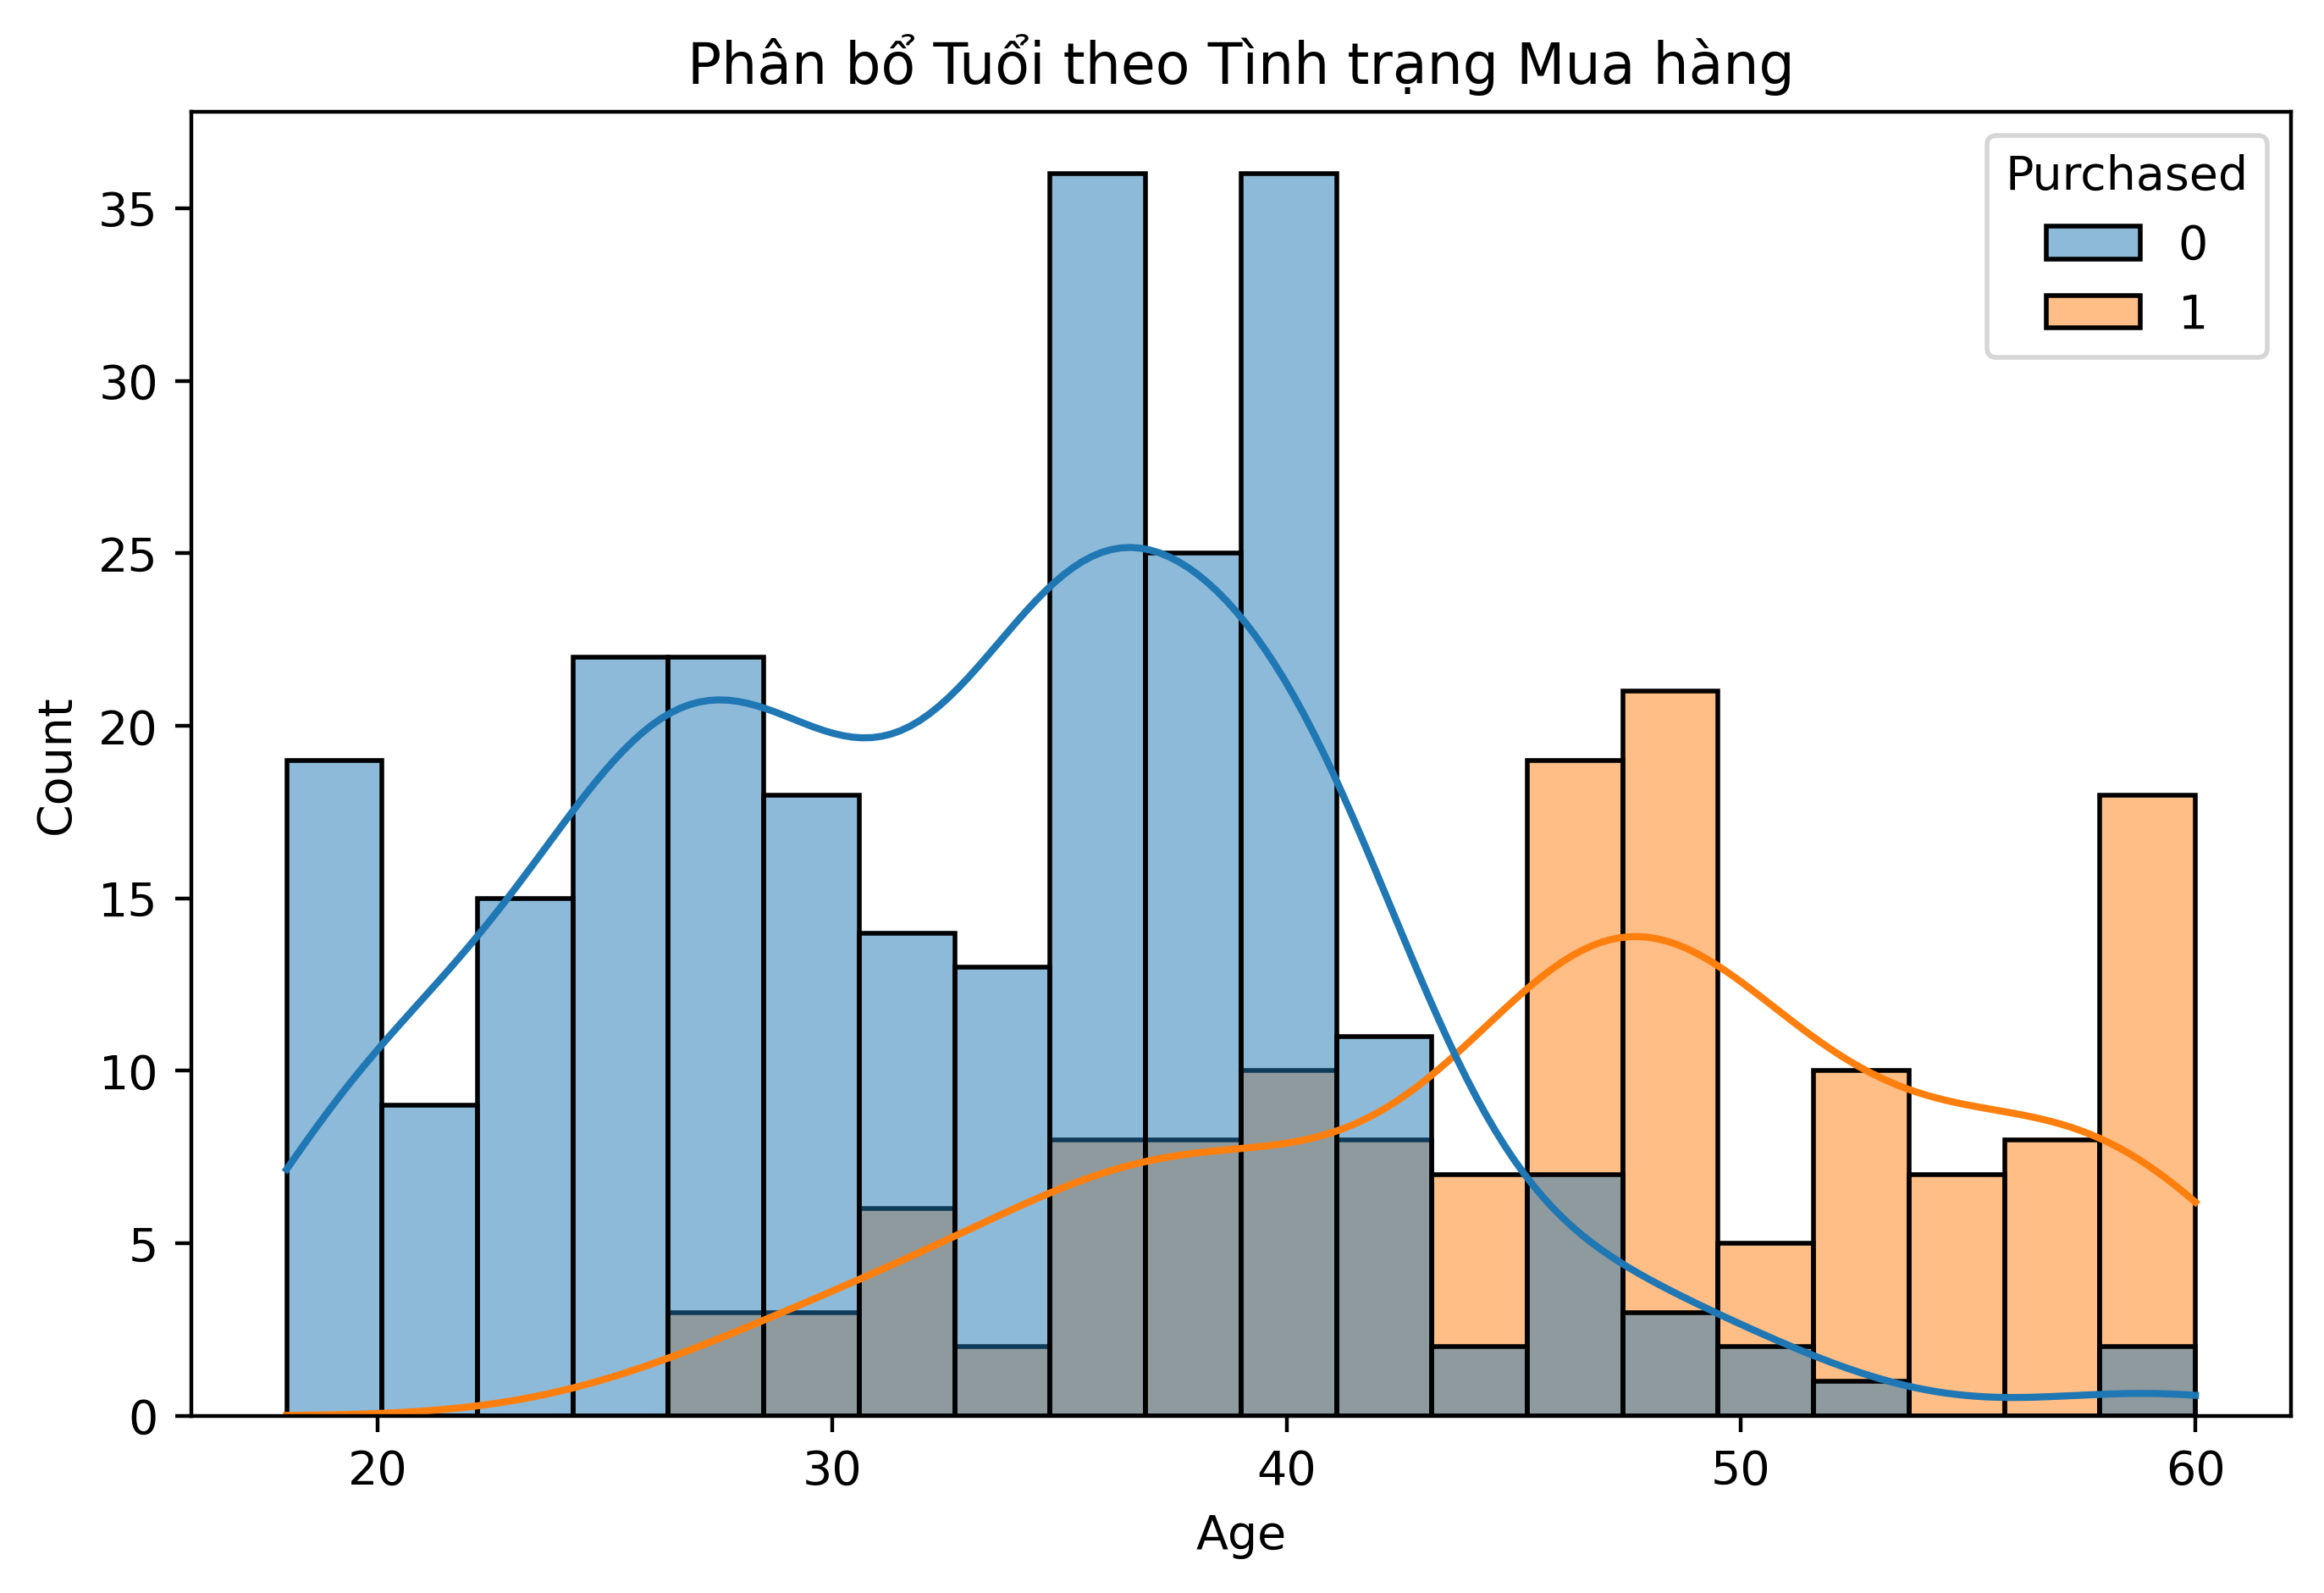

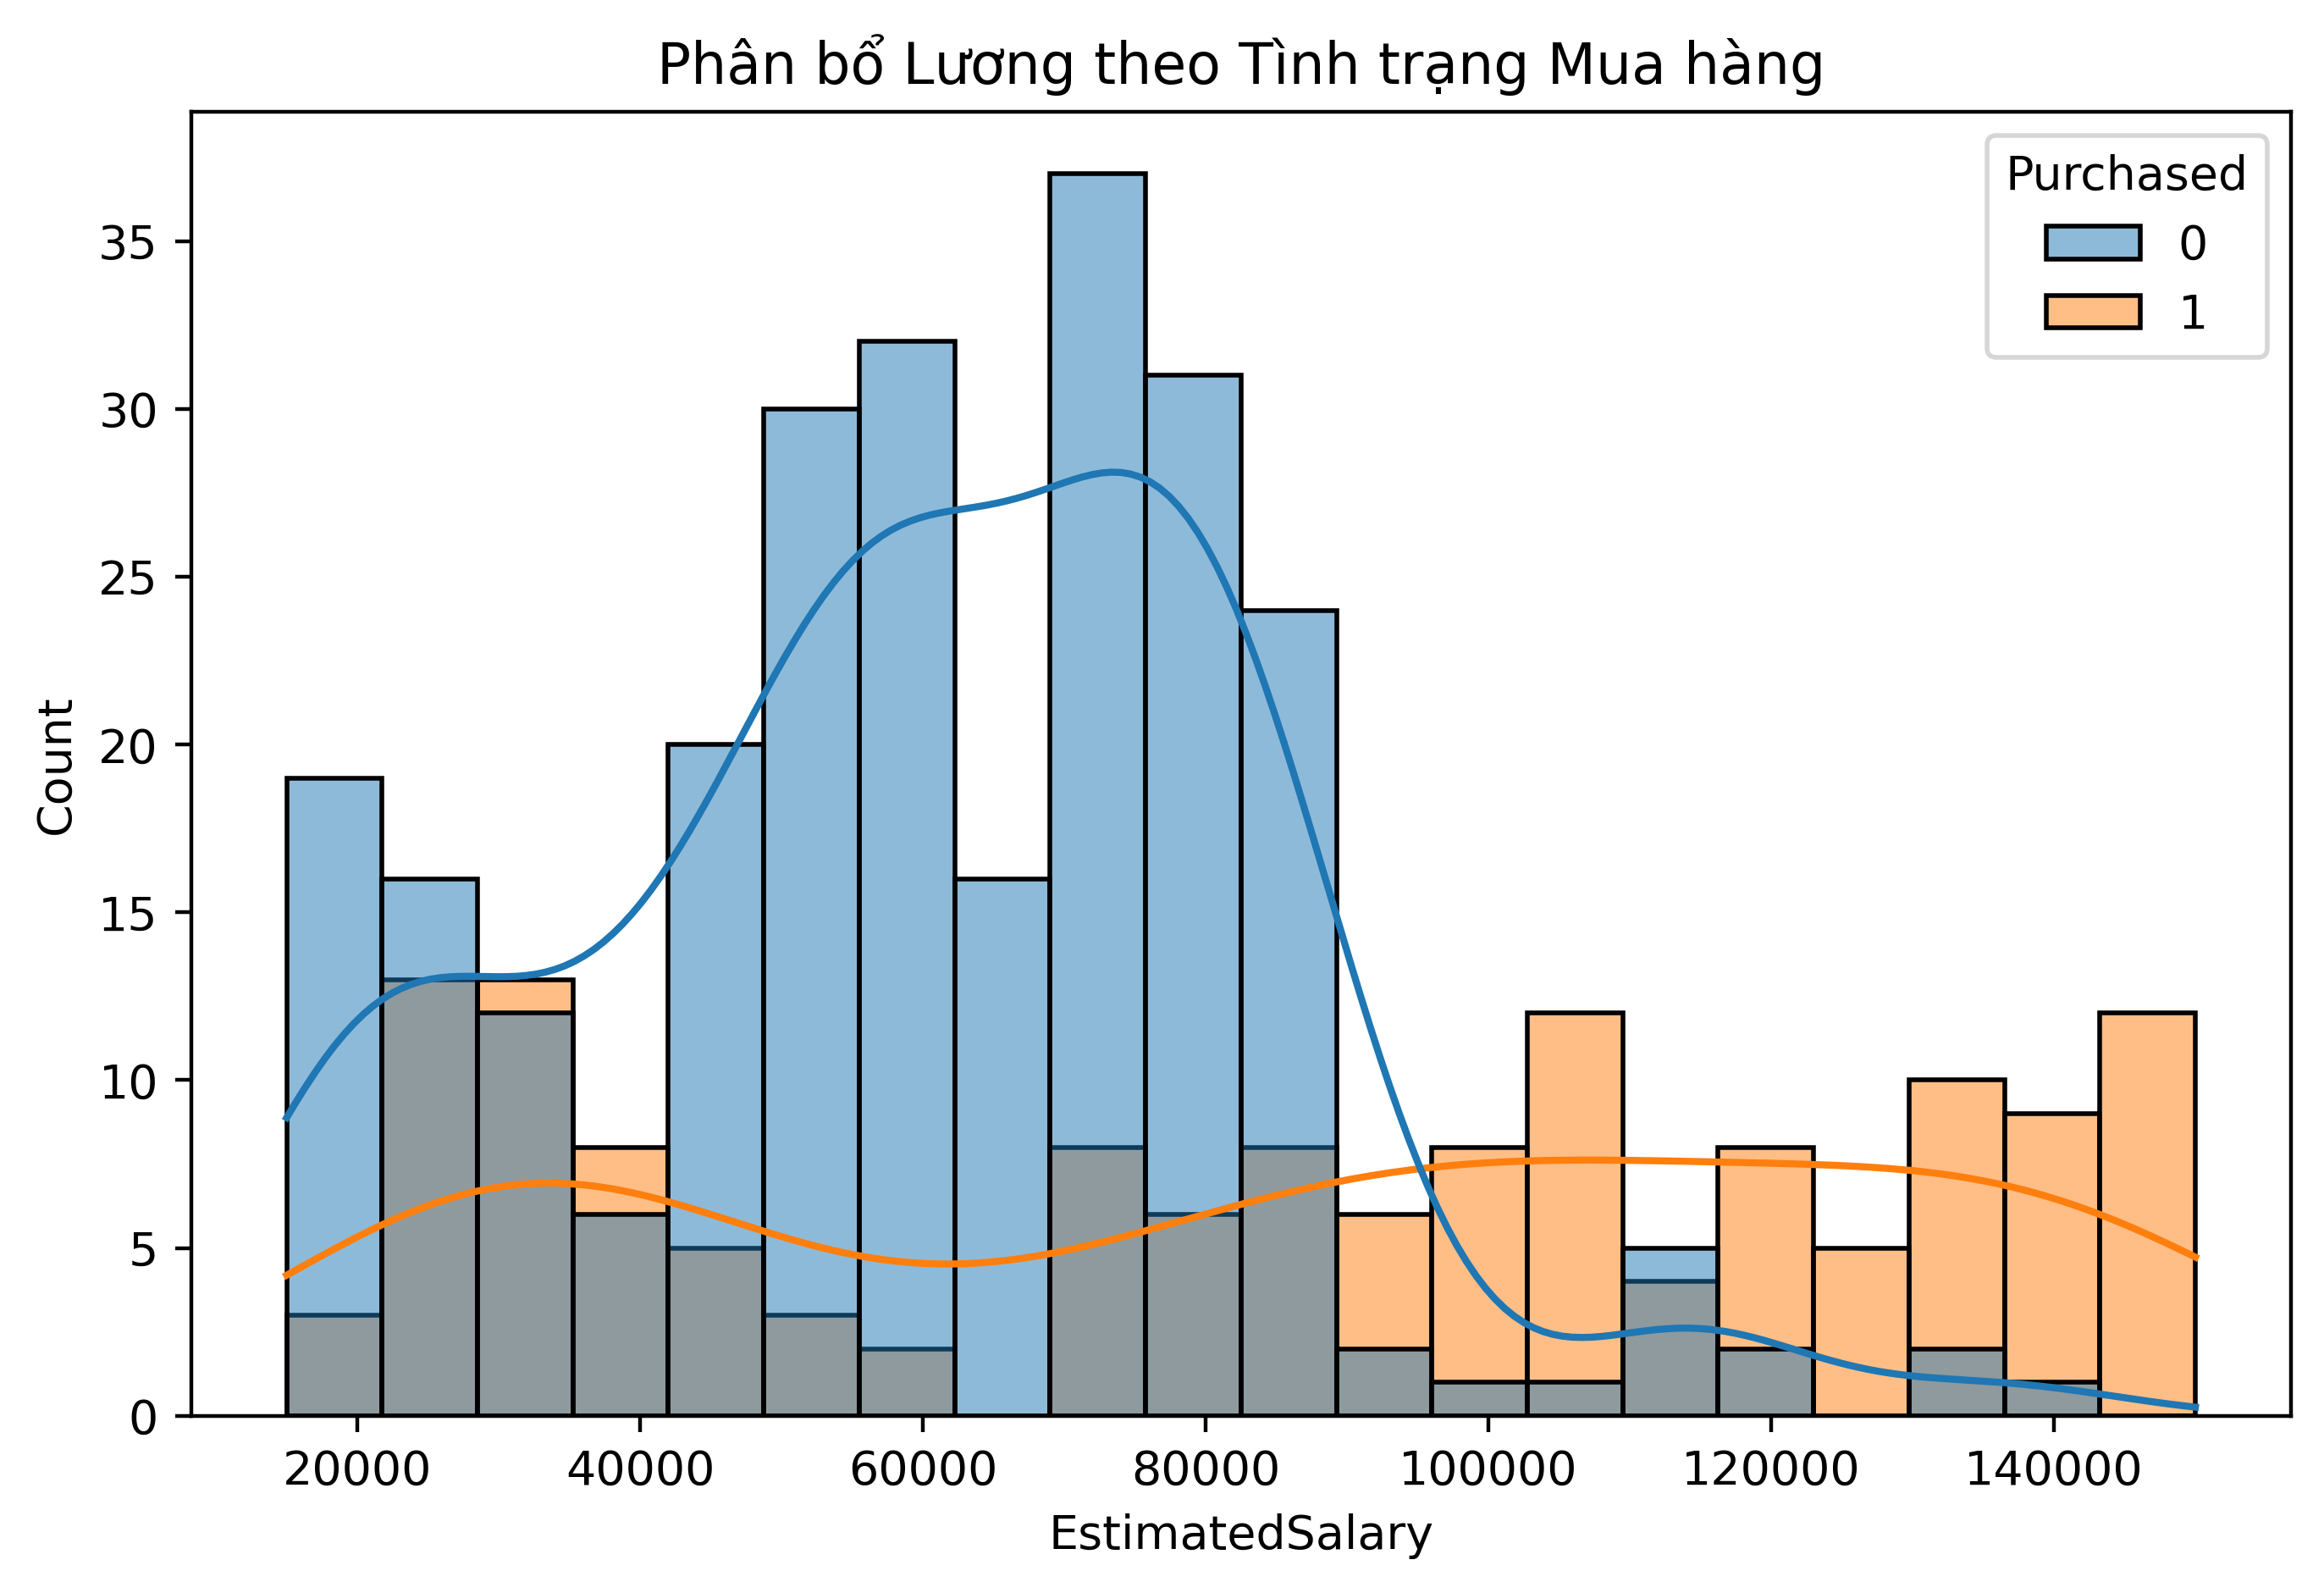

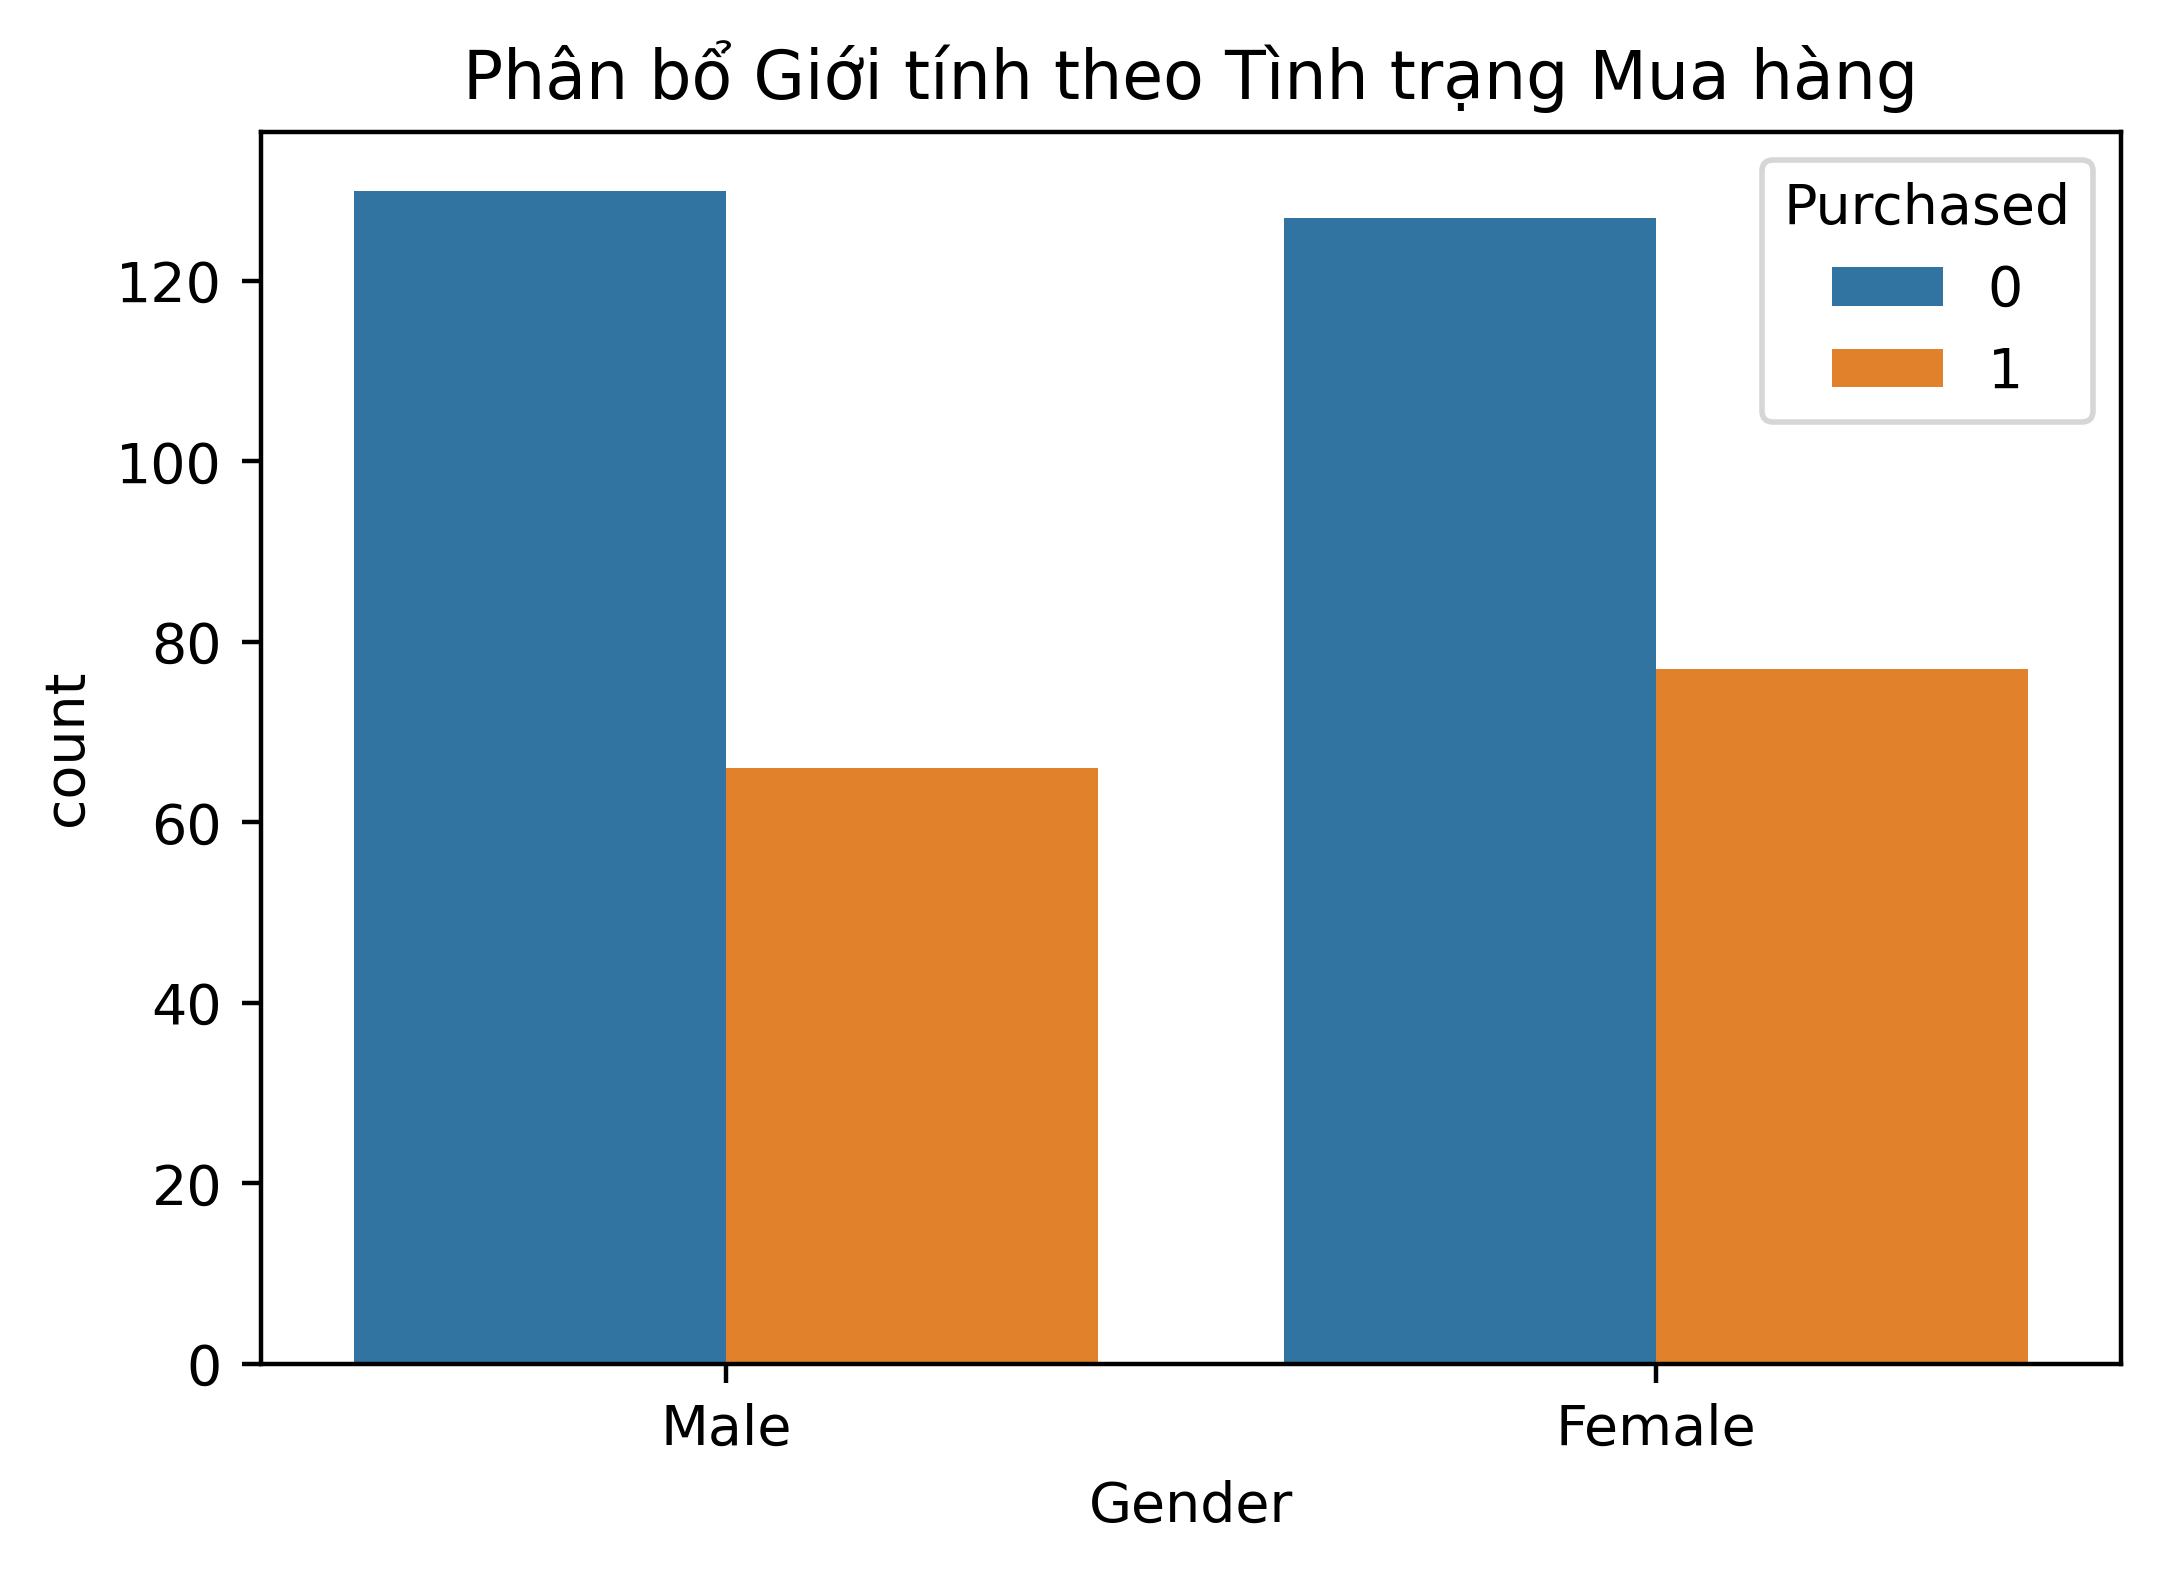

In [ ]:
# 1. Phân bổ của biến mục tiêu (Purchased)
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df)
plt.title('Phân bổ số lượng Mua (1) và Không Mua (0)')
plt.show()

# 2. Mối quan hệ giữa Tuổi (Age) và Mua hàng (Purchased)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Purchased', kde=True, bins=20)
plt.title('Phân bổ Tuổi theo Tình trạng Mua hàng')
plt.show()

# 3. Mối quan hệ giữa Lương (EstimatedSalary) và Mua hàng (Purchased)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased', kde=True, bins=20)
plt.title('Phân bổ Lương theo Tình trạng Mua hàng')
plt.show()

# 4. Mối quan hệ giữa Giới tính (Gender) và Mua hàng (Purchased)
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Phân bổ Giới tính theo Tình trạng Mua hàng')
plt.show()

**Nhận xét:**
+ Biến mục tiêu Purchased: Dữ liệu có mất cân bằng nhẹ (số lượng 0 nhiều hơn 1), nhưng không quá nghiêm trọng.
+ Tuổi (Age): Biểu đồ histplot cho thấy rõ ràng: những người trẻ tuổi (dưới 40) có xu hướng "Không Mua" (0), trong khi những người lớn tuổi hơn (trên 45) có xu hướng "Mua" (1). Đây là một đặc trưng dự đoán rất tốt.
+ Lương (EstimatedSalary): Tương tự, những người có lương thấp (dưới 80,000) có xu hướng "Không Mua" (0), trong khi những người lương cao hơn có xu hướng "Mua" (1). Đây cũng là một đặc trưng dự đoán tốt.
+ Giới tính (Gender): Có vẻ như "Female" (Nữ) có tỷ lệ mua hàng nhỉnh hơn một chút, nhưng sự khác biệt không quá lớn như Tuổi và Lương.


## 2.3.3.4 Tiền xử lý dữ liệu (chuẩn bị cho mô hình)

Chúng ta cần mã hóa cột 'Gender' và loại bỏ 'User ID'.

In [ ]:
# 1. Mã hóa cột 'Gender'
# Chúng ta dùng get_dummies, drop_first=True để biến 'Female' thành 0 và 'Male' thành 1
df_processed = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# 2. Loại bỏ cột 'User ID'
df_processed = df_processed.drop('User ID', axis=1)

print("\n--- Dữ liệu sau khi Tiền xử lý (5 dòng đầu) ---")
display(df_processed.head())

# 3. Tách X (features) và y (target)
features_list = ['Age', 'EstimatedSalary', 'Gender_Male']
target = 'Purchased'

X = df_processed[features_list]
y = df_processed[target]

# 4. Chia dữ liệu (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nKích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")


--- Dữ liệu sau khi Tiền xử lý (5 dòng đầu) ---


,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True



Kích thước tập Train: (320, 3)
Kích thước tập Test: (80, 3)


**Nhận xét:** Scaling (Chuẩn hóa): Không giống như SVM, Gaussian Naive Bayes không yêu cầu chuẩn hóa dữ liệu (StandardScaler). Lý do là GaussianNB tính toán xác suất dựa trên giá trị trung bình (
) và độ lệch chuẩn (
) của từng đặc trưng một cách độc lập. Sự chênh lệch về thang đo (ví dụ: Lương từ 15k-150k và Tuổi từ 18-60) không ảnh hưởng đến cách tính toán của nó.

## 2.3.3.5 Xây dựng mô hình Naïve Bayes (GaussianNB)

Chúng ta khởi tạo và huấn luyện mô hình GaussianNB.

In [ ]:
# 1. Khởi tạo mô hình
# Chúng ta dùng GaussianNB() vì các đặc trưng Age và EstimatedSalary là số liên tục
classifier = GaussianNB()

# 2. Huấn luyện mô hình
print("\nĐang huấn luyện mô hình Gaussian Naive Bayes...")
classifier.fit(X_train, y_train)
print("Hoàn thành!")


Đang huấn luyện mô hình Gaussian Naive Bayes...
Hoàn thành!


## 2.3.3.6 Đánh giá hiệu quả của mô hình

Tương tự bài toán mẫu Spam, chúng ta dùng accuracy, confusion matrix, và classification report.


Độ chính xác (Accuracy): 93.75%

--- Confusion Matrix (Ma trận Nhầm lẫn) ---
[[50  2]
 [ 3 25]]


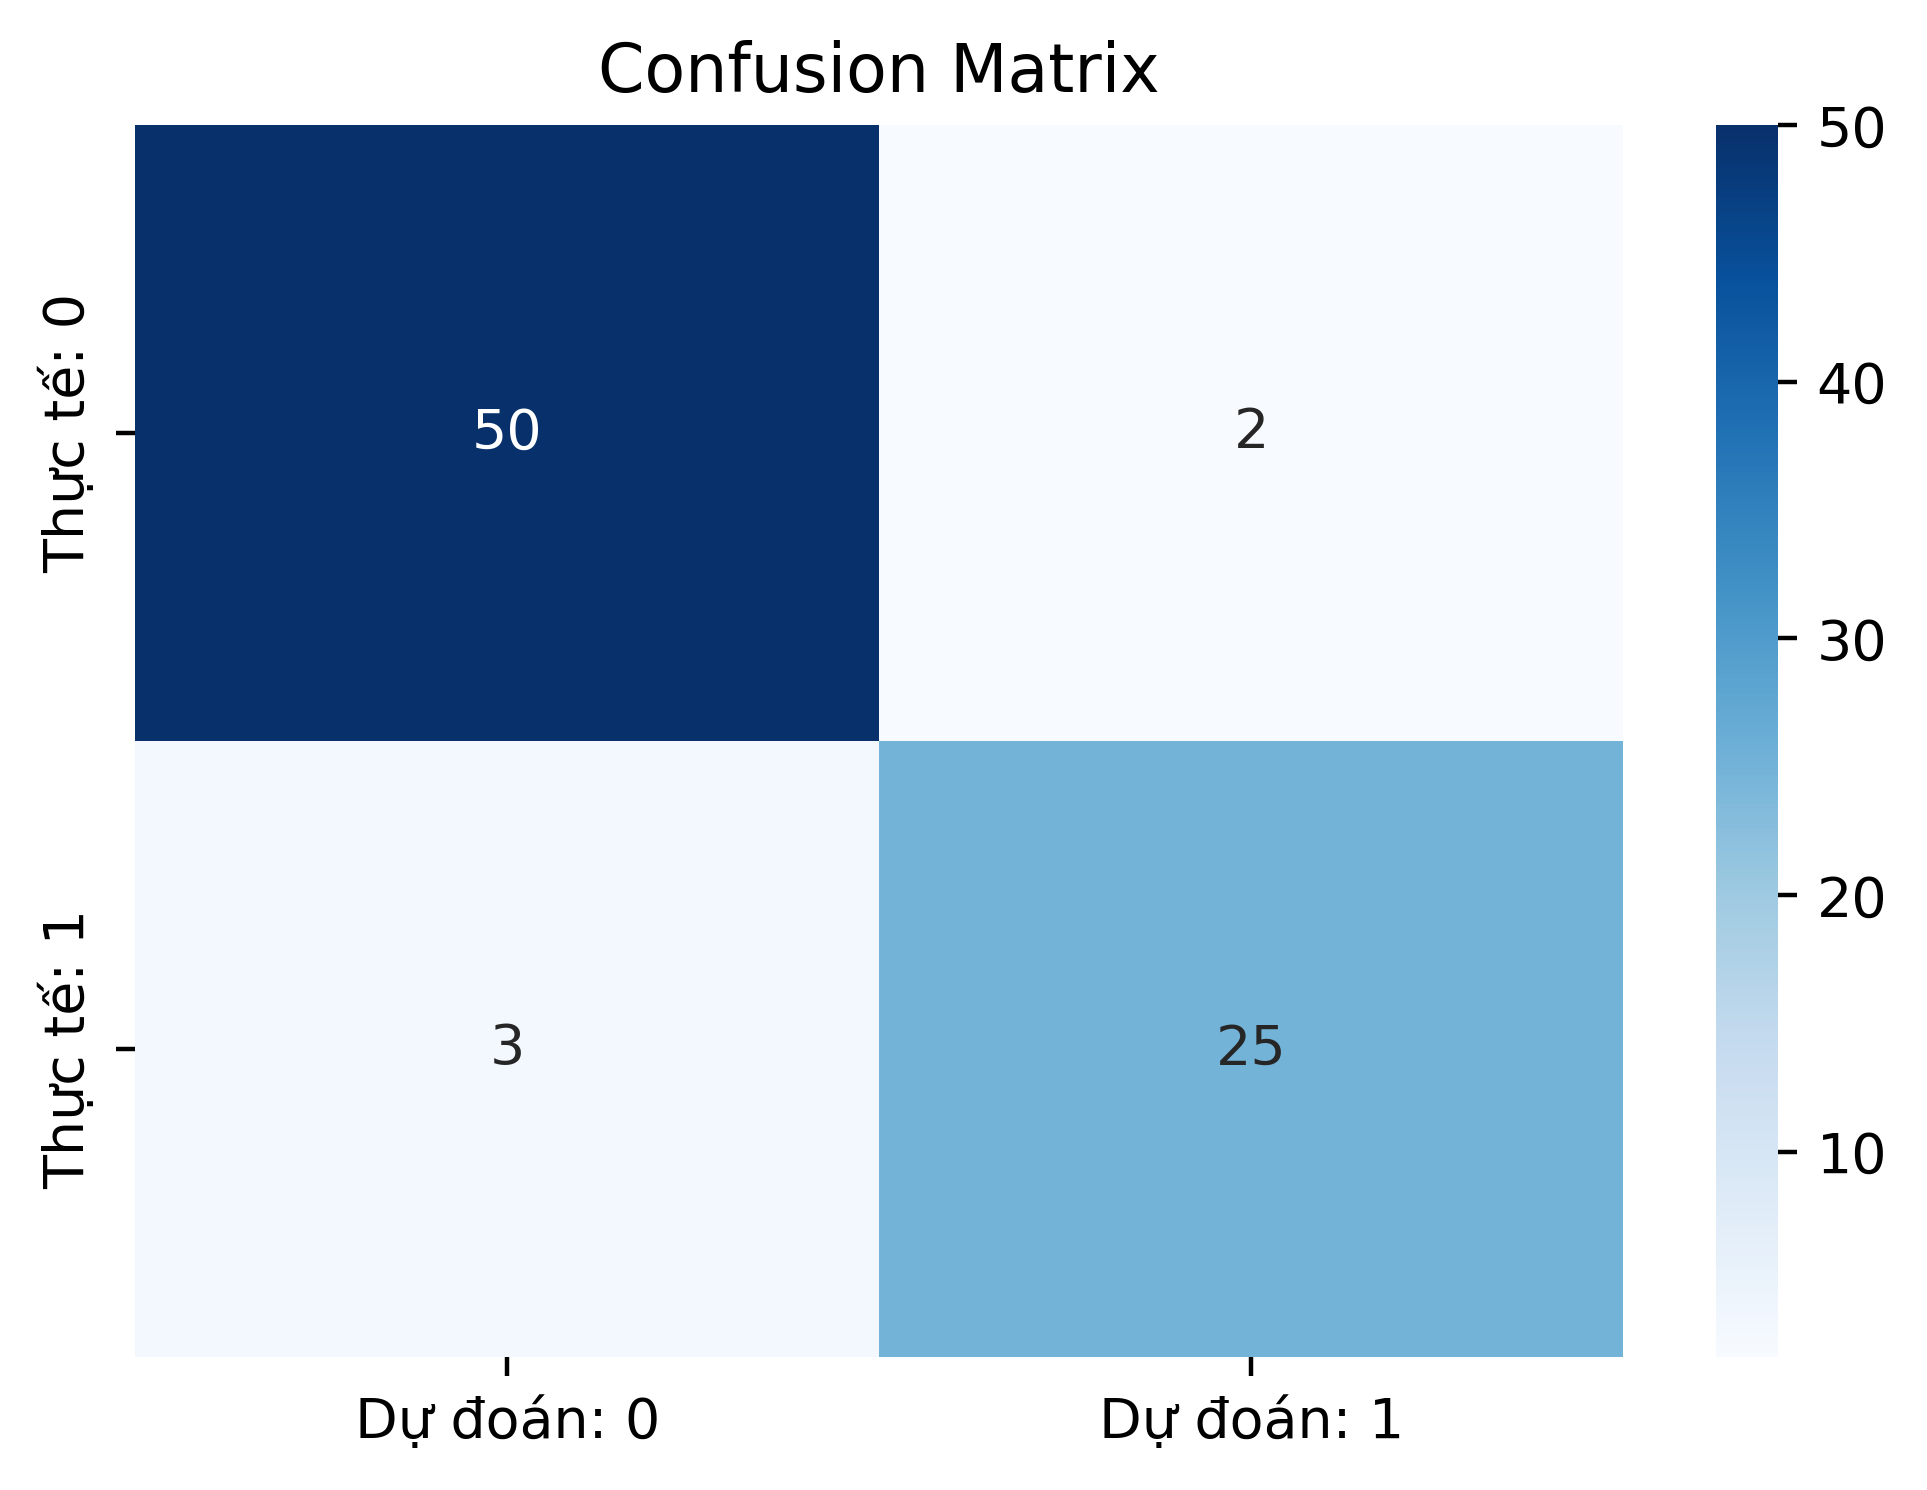


--- Classification Report (Báo cáo Phân loại) ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
# 1. Đưa ra dự đoán trên tập test
y_pred = classifier.predict(X_test)

# 2. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nĐộ chính xác (Accuracy): {accuracy * 100:.2f}%")

print("\n--- Confusion Matrix (Ma trận Nhầm lẫn) ---")
print(conf_matrix)
# Trực quan hóa Confusion Matrix
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix,
            annot=True, # Hiển thị số lượng
            fmt='d',    # Định dạng số nguyên
            cmap="Blues",
            xticklabels=['Dự đoán: 0', 'Dự đoán: 1'],
            yticklabels=['Thực tế: 0', 'Thực tế: 1'])
plt.title('Confusion Matrix')
plt.show()

print("\n--- Classification Report (Báo cáo Phân loại) ---")
print(classification_rep)